### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2021 ###

### Final Course Project: Due 5/2/21, 11:59 pm

# A Mathematical Study of Portfolio Optimization #

###  Exploring Models of Industry/Security Diversification and the Optimal Allocation of a Retail Investment Portfolio Including Cryptocurrencies ###

#### Jacob Lorenz (jlorenz2@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
  1. [Project Overview](#1.A.-Project-Overview)
  2. [Background](#1.B.-Background)
  3. [Data Acquisition](#1.C.-Data-Acquisition)
  4. [Report Outline](#1.D.-Report-Outline)
1. [Mathematical Model](#2.-Mathematical-model)
  1. [Model Overview](#2.A.-Model-Overview)
  2. [Decision Variables](#2.B.-Decision-Variables)
  3. [Constraints](#2.C.-Constraints)
  4. [Objective](#2.D.-Objective)
  5. [Standard Form](#2.E.-Standard-Form)
1. [Solution](#3.-Solution)
  1. [Import Packages](#3.A.-Import-Packages)
  2. [API Client](#3.B.-API-Client)
  3. [Data Structs](#3.C.-Data-Structs)
  4. [Initial Variable Declarations](#3.D.-Initial-Variable-Declarations)
  5. [Data Retrieval](#3.E.-Data-Retrieval)
    1. [Stocks](#3.E.a.-Stocks)
    2. [Cryptocurrencies](#3.E.b.-Cryptocurrencies)
  6. [Compute Covariance Matrices](#3.F.-Compute-Covariance-Matrices)
    1. [Securities](#3.F.a.-Securities)
    2. [Industries](#3.F.b.-Industries)
  7. [Consolidate Other Metrics](#3.G.-Consolidate-Other-Metrics)
    1. [Securities](#3.G.a.-Securities)
    2. [Industries](#3.G.b.-Industries)
  8. [Define Model](#3.H.-Define-Model)
  9. [Compute Results](#3.I.-Compute-Results)
    1. [Securities](#3.I.a.-Securities)
    2. [Industries](#3.I.b.-Industries)
  10. [Compute Tradeoff Curve](#3.J.-Compute-Tradeoff-Curve)
    1. [Securities](#3.J.a.-Securities)
    2. [Industries](#3.J.b.-Industries)
  11. [Combined Optimization](#3.K.-Combined-Optimization)
  12. [Optimal Securities List Printout](#3.L.-Optimal-Securities-List-Printout)
1. [Results and Discussion](#4.-Results-and-discussion)
  1. [Approach](#4.A.-Approach)
  2. [Individual Securities Comparison](#4.B.-Individual-Securities-Comparison)
    1. [Sorted Security Average Daily Return and Standard Deviation](#4.B.a.-Sorted-Security-Average-Daily-Return-and-Standard-Deviation)
    2. [Security Correlation Matrix](#4.B.b.-Security-Correlation-Matrix)
    3. [Security Standard Deviation vs Expected Daily Return Scatter Plot](#4.B.c.-Security-Standard-Deviation-vs-Expected-Daily-Return-Scatter-Plot)
    4. [Optimal Portfolio (λ = 1)](#4.B.d.-Optimal-Portfolio-(λ-=-1))
    5. [Optimal Portfolio (λ = 3e-2)](#4.B.e.-Optimal-Portfolio-(λ-=-3e-2))
    6. [Optimal Portfolio Paredo Curve](#4.B.f.-Optimal-Portfolio-Paredo-Curve)
  3. [Industry Comparison](#4.C.-Industry-Comparison)
    1. [Sorted Industry Average Daily Return and Standard Deviation](#4.C.a.-Sorted-Industry-Average-Daily-Return-and-Standard-Deviation)
    2. [Industry Correlation Matrix](#4.C.b.-Industry-Correlation-Matrix)
    3. [Industry Standard Deviation vs Expected Daily Return Scatter Plot](#4.C.c.-Industry-Standard-Deviation-vs-Expected-Daily-Return-Scatter-Plot)
    4. [Optimal Industry Allocation (λ = 1)](#4.C.d.-Optimal-Industry-Allocation-(λ-=-1))
    5. [Optimal Industry Allocation (λ = 3e-2)](#4.C.e.-Optimal-Industry-Allocation-(λ-=-3e-2))
    6. [Optimal Industry Allocation Paredo Curve](#4.C.f.-Optimal-Industry-Allocation-Paredo-Curve)
  4. [Combined Optimization](#4.D.-Combined-Optimization)
    1. [Optimal Combined Portfolio](#4.D.a.-Optimal-Combined-Portfolio)
    2. [Optimal Combined Portfolio Paredo Curve](#4.D.a.-Optimal-Combined-Portfolio-Paredo-Curve)
  5. [Discussion](#4.E.-Discussion)
    1. [General Results Discussion](#4.E.a.-General-Results-Discussion)
    2. [Model Limitations](#4.E.b.-Model-Limitations)
    3. [Assumption Sensitivity](#4.E.c.-Assumption-Sensitivity)
1. [Conclusion](#5.-Conclusion)
  1. [Summary](#5.A.-Summary)
  2. [Future Work](#5.B.-Future-Work)

## 1. Introduction ##

### 1.A. Project Overview
In this project I begin by procuring the daily time series data for the past 20 years' (or lifetime if $\leq$ 20 years) worth of history of the securities currently in the S&P 500 and 14 of the top cryptocurrencies by market cap. After obtaining the data, I organize it, group by industry, and run some statstical calculations on the data set to determine metrics such as the average daily return, variance, and covariance between all securities and industries. Using these metrics, I then go on to determine an optimal portfolio over all included securities by first determining the optimal industry allocation, and subsequently determining the optimal allocation of securities within the chosen industries.

### 1.B. Background
The New York Stock Exchange had its first trading activity in 1792, and since then, men and women of all different races, ethnicities, ages, and walks of life have set out to build a strong financial future for themselves by investing in stocks and other markets, and rightly so! Compound interest over the span of decades can transform an individual's financial position dramatically. If you are going to spend the time and have the patience to play the investment game over your lifetime, it seems logical that you should place your money in securities and industries that are going to best-reward your patience and responsibility and protect you from external conditions such as government debt, bailouts, and inflation.

Between 1933 and 1971, while the United States Government still accepted the exchange of gold for USD on the global market, outstanding debt of the United States Government increased by an average annual rate of \%42.90, from $\$$23 Billion to $\$$398 Billion. Between 1971, when the United States completely abandoned the exchange of gold for USD on the global market, and 2008, when the United States suffered a catastrophic recession and subsequent bailout of the infringing mortgage lenders, outstanding debt increased by an average annual rate of \%65.37, from $\$$398 Billion to $\$$10.025 Trillion. In the same time, the United States M1 monetary supply increased by an average of \%2.28 annually, from $\$$215.5 Billion to $\$$1.3777 Trillion. Since 2008, the United States has been in one of its longest economic expansions in history, seeing all time highs in most of its financial markets several times over. In the same time period; however, the United States Government has seen its outstanding debt increase by an average annual rate of \%17.43, from $\$$10.025 Trillion to $\$$27.748 Trillion and its M1 monetary supply has increased at an average rate of \%93.48 from $\$$1.3777 Trillion to $\$$18.1206 Trillion (https://www.thebalance.com/national-debt-by-year-compared-to-gdp-and-major-events-3306287, https://fred.stlouisfed.org/data/M1SL.txt). I believe there is a looming economic crisis on the horizon due to rampant government spending, and that the current financial markets' meteoric rises are giving an inflated sense of economic expansion despite accelerating inflation, an incomprehensible amount of debt, and fluctuating unemployment rates. Investigating alternative asset classes before the ship sinks may perhaps provide a life boat to row away in safety.

On October 31, 2008, an individual or group of individuals under the pseudonym Satoshi Nakamoto published a whitepaper outlining a fixed-supply, peer-to-peer electronic cash system known as Bitcoin (https://bitcoin.org/bitcoin.pdf). Although the flagship cryptocurrency was written off for years as a means of procuring illegal goods and services, it has been steadily cementing itself in the global economy as a viable asset class and store of wealth given its proof-based cryptographic network and fixed supply-cap of 21 Million Bitcoin. Bitcoin has had an impressive decade to say the least, and has given inspiration to a number of additional cryptocurrency projects that are gaining traction around the world for various use cases with each passing day.

Bitcoin and cryptocurrencies in general are disruptive technologies, and as such, they have drawn criticism from some big names in the traditional financial world. Warren Buffet, for example, famously called Bitcoin "rat poison squared". Meanwhile, there are those on the opposite side of the aisle such as Yale economist Aleh Tsyvinski who concludes that an optimal portfolio should contain a \%6 allocation to Bitcoin (https://www.nber.org/system/files/working_papers/w24877/w24877.pdf), or Tesla CEO Elon Musk, who recently announced that Tesla would be holding Bitcoin on its balance sheet as a hedge against inflation and accepting the dominant cryptocurrency as payment for its electric vehicles (https://www.cnbc.com/2021/02/08/tesla-buys-1point5-billion-in-bitcoin.html, https://www.cnbc.com/2021/03/24/elon-musk-says-people-can-now-buy-a-tesla-with-bitcoin.html). As a 26 year old tech enthusiast, I have the personal observation from my lifetime that anything that has had the potential to go digital, has gone digital and has taken over by storm to exceed peoples' imaginations at an accelerating pace. I don't think the change in medium of monetary exchange is going to be any different.

The primary purpose of this project is to simply explore what the data has to say about cryptocurrency allocation in an optimal investment portfolio, as well as exploring the difference in results obtained by optimizing over all securities individually compared to optimizing over all industries first, and then optimizing over the securities in the chosen industries. This project will be used as baseline results for continued research into the summer on ways to adjust the model and assumptions.

### 1.C. Data Acquisition
The data used in this project is procured from Alphavantage using their Daily Adjusted Time Series (https://www.alphavantage.co/documentation/#dailyadj) and Daily Digital Currency (https://www.alphavantage.co/documentation/#currency-daily) API endpoints. They provided me with an Academic Development API Key that allows for unlimited daily requests and 200 requests per minute. I gathered a list of all the tickers of securities in the S&P 500 and the chosen cryptocurrency tickers, which are then used as keys to access a particular security's time series data.

### 1.D. Report Outline
In this report, I begin by discussing the mathematical model of the underlying optimization problem in section 2. Section 3 contains all the code blocks in sequential order that are used in this portfolio optimization tool. Section 4 contains a number of figures displaying results of various steps in the optimization process. Finally, the report is concluded in section 5 with a discussion of the results and some ideas for how this project can be expanded upon into the summer.

## 2. Mathematical model ##

### 2.A. Model Overview
The mathematical model in this case is a quadratic regularization program based on the model of modern portfolio theory that Economist Harry Markkowitz introduced in 1952 and for which he would go on to win the Nobel Prize in Economics in 1990.

In general, the idea of the program is to use a tradeoff between expected return and variance. The goal is to maximize expected return while minimizing perceived risk, or variance, using a regularization parameter to give varying weight to the significance of maximal return vs minimal risk. Furthermore, we set a few custom constraints to provide bounds for the minimum and maximum investment in any one particular industry / security.

In the flow of the program, we use several iterations of this optimization function to first get the optimal breakdown of industries, and then find the optimal security selection for each chosen industry in the optimal portfolio.

### 2.B. Decision Variables

$x_i$ : A set of real-valued variables that represent the \% investment in security / industry $i$

### 2.C. Constraints
First of all, we need to make sure that $0 \leq x_i$ $\forall i$.

$$
    x_i \geq 0
$$

Second, we added a custom constraint to promote diversification, and we set a maximum investment in any one particular industry or security at 20\% of the portfolio:

$$
    x_i \leq .2
$$

And finally, we set the constraint ensuring that the entire protfolio allocation adds up to 1:

$$
    \sum_{i=0}^{N} x_i = 1
$$

### 2.D. Objective
The objective function is a tradeoff based on a regularization parameter, $λ$, between the expected return and the portfolio's variance. Let Cov represent the covariance matrix calculated between all securities / industries being considered, and let Ret represent the expected return vector for all securities / industries being considered in the portfolio. Then, our objective is:

$$
    \min_{x_i} \;\;\; (λ * \sum_{i=1}^N \sum_{j=1}^N x_i * Cov_{i,j} * x_j) - (\sum_{i=1}^N Ret_i * x_i * b_i)
$$

### 2.E. Standard Form
Using the variables, constraints, and objective described above, we have the following standard form for our model:

$$
    \max_{x_i} \;\;\; (\sum_{i=1}^N Ret_i * x_i) - (λ * \sum_{i=1}^N \sum_{j=1}^N x_i * Cov_{i,j} * x_j) \\
    \text{subject to:} \\
    x_i \leq .2 \\
    \sum_{i=0}^{N} x_i = 1 \\
    x_i \geq 0 \\
$$

## 3. Solution ##
**Note:** Please run all code blocks in sequential order

**Note:** Some of the codeblocks do some lengthy object manipulation and statistical calculation, and they can take some time to run. They will finish, and result in an optimized portfolio

### 3.A. Import Packages
Import the packages needed as dependencies for this program.

In [1]:
import Dates
using Pkg
Pkg.add("Latexify");
Pkg.add("LaTeXStrings");
Pkg.add("LinearAlgebra");
Pkg.add("JuMP");
Pkg.add("PyPlot");
Pkg.add("NamedArrays");
Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("Ipopt");
Pkg.add("HTTP");
Pkg.add("JSON");
;

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.t

### 3.B. API Client
Write an API Client capable of making requests to two different endpoints.

In [2]:
using HTTP
using JSON
using DataFrames

# Write some general API client request functions

# Uses the TIME_SERIES_DAILY_ADJUSTED api endpoint
# https://www.alphavantage.co/documentation/#dailyadj
function retrieveStockTimeSeriesData(ticker)
    
    apikey = "N5ERQO6K97VZX2Z8"
    base = "https://www.alphavantage.co/query?"
    
    url = string(
        base, 
        "function=TIME_SERIES_DAILY_ADJUSTED",
        "&symbol=", ticker,
        "&datatype=json",
        "&apikey=", apikey,
        "&outputsize=full"
    )
    
    response = HTTP.get(url);
    response_text = String(response.body);
    json_obj = JSON.parse(response_text);
    return (json_obj);
end

# Used the DIGITAL_CURRENCY_DAILY api endpoint
# https://www.alphavantage.co/documentation/#currency-daily
function retrieveCryptocurrencyTimeSeriesData(symbol, market)
    
    apikey = "N5ERQO6K97VZX2Z8"
    base = "https://www.alphavantage.co/query?"
    
    url = string(
        base, 
        "function=DIGITAL_CURRENCY_DAILY",
        "&symbol=", symbol,
        "&apikey=", apikey,
        "&market=", market,
        "&datatype=json",
        "&outputsize=full"
    )
    
    response = HTTP.get(url)
    response_text = String(response.body)
    json_obj = JSON.parse(response_text)
    return (json_obj);
end
;

### 3.C. Data Structs
Create the object structures that will be used to store object representations of our data.

In [3]:
# Define the structs used in data management / organization

struct industryCollectionObject
    industryId # - Int64
    industryName # - String
    numberSecurities # - Int64
    securityObjects # - Dict : String(tickerSymbol) => stockTickerObject / cryptocurrencyTickerObject
    securityObjectKeys # - Vector{String(tickerSymbol)}
end

struct stockTickerObject
    tickerId # - Int64
    tickerSymbol # - String
    companyName # - String
    industry # - String
    priceHistory # - Dict : String(Float64(numericalDateKey)) => stockPriceHistoryDataPoint
    sortedKeys # - Vector{Float64(numericalDateKey)}
end

struct cryptocurrencyTickerObject
    tickerId # - Int64
    tickerSymbol # - String
    cryptocurrencyName # - String
    industry # - String
    priceHistory # - Dict : String(Float64(numericalDateKey)) => cryptocurrencyPriceHistoryDataPoint
    sortedKeys # - Vector{Float64(numericalDateKey)}
end

struct stockPriceHistoryDataPoint
    date # - Float64 
    open # - Float64
    high # - Float64
    low # - Float64
    close # - Float64
    adjustedClose # - Float64
    volume # - Float64
    dividendAmount # - Float64
    splitCoefficient # - Float64
    intradayPercentChange # - Float64
    previousCloseToClosePercentChange # - Float64: last n-1 days, String: if first day
end

struct cryptocurrencyPriceHistoryDataPoint
    date # - Float64
    openUSD # - Float64
    openAltMarket # - Float64
    highUSD # - Float64
    highAltMarket # - Float64
    lowUSD # - Float64
    lowAltMarket # - Float64
    closeUSD # - Float64
    closeAltMarket # - Float64
    volume # - Float64
    marketCap # - Float64
    intradayPercentChange # - Float64
    previousCloseToClosePercentChange # - Float64: last n-1 days, String: if first day
end
;

### 3.D. Initial Variable Declarations
Create variables that will be used as the main storage engine throughout the program.

In [4]:
using CSV
using DataFrames

# Project Seed Data Retrieval / Setup
stocks = CSV.read("TickerSymbols.csv", header=0, DataFrame); # - DataFrame
cryptocurrencies = CSV.read("CryptocurrencySymbols.csv", header=0, DataFrame); # - DataFrame

stock_tickers = stocks[:, 1]; # - Array{String,1}
stock_companyNames = stocks[:, 2]; # - Array{String,1}
stock_industries = stocks[:, 3]; # - Array{String,1}
numberStocks = length(stock_tickers);

cryptocurrency_tickers = cryptocurrencies[:, 1]; # - Array{String,1}
numberCryptocurrencies = length(cryptocurrency_tickers);

altMarketAcronym = "USD";

# Industry Data Structures
stockIndustryHistoricalAverageIntradayReturn = Dict{String, Float64}();
stockIndustryHistoricalAverageCloseToCloseReturn = Dict{String, Float64}();
stockIndustryHistories = Dict{String, industryCollectionObject}();

cryptocurrencyIndustryHistoricalAverageIntradayReturn = Dict{String, Float64}();
cryptocurrencyIndustryHistoricalAverageCloseToCloseReturn = Dict{String, Float64}();
cryptocurrencyIndustryHistories = Dict{String, industryCollectionObject}();

industryIdMap = Dict{Int64, String}();

# Securities Data Structures
stockHistoricalAverageIntradayReturn = Dict{String, Float64}();
stockHistoricalAverageCloseToCloseReturn = Dict{String, Float64}();
stockHistories = Vector{stockTickerObject}()

cryptocurrencyHistoricalAverageIntradayReturn = Dict{String, Float64}();
cryptocurrencyHistoricalAverageCloseToCloseReturn = Dict{String, Float64}();
cryptocurrencyHistories = Vector{cryptocurrencyTickerObject}();

### 3.E. Data Retrieval
Retrieve stock and cryptocurrency data from the alphavantage endpoints using the API Clients written in part 3.B.

#### 3.E.a. Stocks

In [5]:
using Dates

counter = 0; #Int64
industryCounter = 0;
for i in 1:numberStocks
    counter += 1;
    curStockTicker = stock_tickers[i];
    curStockCompanyName = stock_companyNames[i];
    curStockIndustry = stock_industries[i];
    curStockData = retrieveStockTimeSeriesData(curStockTicker);
    
    # Parse the data into daily objects
    timeSeriesData = curStockData["Time Series (Daily)"];
    numberDataPoints = length(timeSeriesData);
    
    newDataDict = Dict{String, Any}()
    
    # YYYY-MM-DD - need to quantify
    dates = collect(keys(timeSeriesData))
    # For sorting
    date_times = zeros(length(dates));
    
    for j in 1:length(dates)
        # Create a Date Object from the key
        curDateObject = DateTime(dates[j],"yyyy-mm-dd")
        # Get the epoch time
        curDateTime = datetime2unix(curDateObject) # Float64
        # Add the entry to our date_times vector
        date_times[j] = curDateTime;
        # Get the data, Dict(String, Any)
        curDateData = timeSeriesData[dates[j]];
        # Set the new quantified key and data in other vector
        newDataDict[string(curDateTime)] = curDateData;
    end
    
    # Now we need to sort the date_times, Vector{Float64}
    SortedNumericalKeys = sort(date_times);
    
    # Put the data into new dict, Dict : string(numericalDateKey) => stockPriceHistoryDataPoint
    stockDailyHistory = Dict{String, stockPriceHistoryDataPoint}()
    
    # Check if this is a brand new industry, if so, create a new industry object
    if !haskey(stockIndustryHistories, curStockIndustry)
        # Dict does not have this industry, create a new entry with this stock
        industryCounter += 1;
        
        newSecurityObjectsDict = Dict{String, stockTickerObject}();
        newSecurityObjectKeysVector = Vector{String}();
        
        newIndustryObject = industryCollectionObject(
            industryCounter,
            curStockIndustry,
            0,
            newSecurityObjectsDict,
            newSecurityObjectKeysVector
        );
        
        stockIndustryHistories[curStockIndustry] = newIndustryObject
        stockIndustryHistoricalAverageIntradayReturn[curStockIndustry] = 0
        stockIndustryHistoricalAverageCloseToCloseReturn[curStockIndustry] = 0
        industryIdMap[industryCounter] = curStockIndustry;
    end
    
    # Go through all the days of this stock's history and parse the data
    intradayPercentChangeSum = 0;
    closeToClosePercentChangeSum = 0;
    previousDayClose = 0;
    
    for j in 1:length(SortedNumericalKeys)
        curKey = SortedNumericalKeys[j]; # Float64
        curKeyData = newDataDict[string(curKey)];
        
        # Parse from JSON response
        # https://www.alphavantage.co/documentation/#dailyadj
        curKeyOpen = parse(Float64,curKeyData["1. open"]);
        curKeyHigh = parse(Float64,curKeyData["2. high"]);
        curKeyLow = parse(Float64,curKeyData["3. low"]);
        curKeyClose = parse(Float64,curKeyData["4. close"]);
        curKeyAdjustedClose = parse(Float64,curKeyData["5. adjusted close"]);
        curKeyVolume = parse(Float64,curKeyData["6. volume"]);
        curKeyDividendAmount = parse(Float64,curKeyData["7. dividend amount"]);
        curKeySplitCoefficient = parse(Float64,curKeyData["8. split coefficient"]);

        # Calculate % changes
        curKeyIntradayPercentChange = 
            (curKeyClose - curKeyOpen) / curKeyOpen
        intradayPercentChangeSum += curKeyIntradayPercentChange
        stockIndustryHistoricalAverageIntradayReturn[curStockIndustry] += curKeyIntradayPercentChange
        
        # If this is the first day, there will be no close to close
        # TODO: Think of other ways to handle this? open - close for day 1 perhaps?
        if (j == 1) 
#             curKeyPreviousCloseToClosePercentChange = "NA"
            curKeyPreviousCloseToClosePercentChange = (curKeyClose - curKeyOpen) / curKeyOpen
            previousDayClose = curKeyClose
        else
            curKeyPreviousCloseToClosePercentChange = 
                (curKeyClose - previousDayClose) / previousDayClose
            closeToClosePercentChangeSum += curKeyPreviousCloseToClosePercentChange
            stockIndustryHistoricalAverageCloseToCloseReturn[curStockIndustry] += curKeyPreviousCloseToClosePercentChange
            previousDayClose = curKeyClose
        end
        
        # Create the stockPriceHistoryDataPoint object for representation
        curPriceHistoryDataPoint = stockPriceHistoryDataPoint(
            curKey,
            curKeyOpen,
            curKeyHigh,
            curKeyLow,
            curKeyClose,
            curKeyAdjustedClose,
            curKeyVolume,
            curKeyDividendAmount,
            curKeySplitCoefficient,
            curKeyIntradayPercentChange,
            curKeyPreviousCloseToClosePercentChange
        );
        
        # Set the Dict entry for 
        # String(datetime2unix - Float64(yyyy-mm-dd)) => stockPriceHistoryDataPoint
        stockDailyHistory[string(curKey)] = curPriceHistoryDataPoint;
    end
    
    # Calculate averages for this particular stock's historical return
    averageIntradayPercentChange = 
        intradayPercentChangeSum / length(SortedNumericalKeys)
    stockHistoricalAverageIntradayReturn[curStockTicker] = averageIntradayPercentChange
    
    # Need to account for the first close to close being "N/A" ... for now
#     averageCloseToClosePercentChange = 
#         closeToClosePercentChangeSum / (length(SortedNumericalKeys) - 1)
    averageCloseToClosePercentChange = 
        closeToClosePercentChangeSum / (length(SortedNumericalKeys))
    stockHistoricalAverageCloseToCloseReturn[curStockTicker] = averageCloseToClosePercentChange
    
    # Create the stockTickerObject object for representation
    curStockTickerObject = stockTickerObject(
        counter,
        curStockTicker,
        curStockCompanyName,
        curStockIndustry,
        stockDailyHistory,
        SortedNumericalKeys
    )
    # Push to stockHistories - Vector{stockTickerObject}
    push!(stockHistories, curStockTickerObject);
    
    # Add the stockTickerObject into the relevant industry data structures
#     stockIndustryHistories[curStockIndustry].numberSecurities += 1
    stockIndustryHistories[curStockIndustry].securityObjects[curStockTicker] = curStockTickerObject
    push!(stockIndustryHistories[curStockIndustry].securityObjectKeys, curStockTicker)
end

# Convert the total sums into averages
industryKeys = collect(keys(stockIndustryHistories))

for i in 1:length(industryKeys)
    curIndustryKey = industryKeys[i]
    curIndustryHistoryObject = stockIndustryHistories[curIndustryKey]
    
    curIndustryIntradayTotalReturnSum = stockIndustryHistoricalAverageIntradayReturn[curIndustryKey]
    curIndustryCloseToCloseTotalReturnSum = stockIndustryHistoricalAverageCloseToCloseReturn[curIndustryKey]
    
    # Need to find the number of days used to calculate this sum
    curIndustryHistoryObjectTickerKeysVector = curIndustryHistoryObject.securityObjectKeys
    curIndustryHistoryObjectDict = curIndustryHistoryObject.securityObjects

    numberDays = 0;
    numberIndustrySecurities = length(curIndustryHistoryObjectTickerKeysVector)
    
    for j in 1:numberIndustrySecurities
        curSecurityKey = curIndustryHistoryObjectTickerKeysVector[j]
        curSecurityTickerObject =  curIndustryHistoryObjectDict[curSecurityKey]
        
        numberDays += length(curSecurityTickerObject.sortedKeys)
    end
    
    # Now we have the number of days used in the sums, find and set averages
    stockIndustryHistoricalAverageIntradayReturn[curIndustryKey] = 
        curIndustryIntradayTotalReturnSum / numberDays;
    
    # Need to account for the first close to close of each security's history being "N/A"
#     stockIndustryHistoricalAverageCloseToCloseReturn[curIndustryKey] = 
#         curIndustryCloseToCloseTotalReturnSum / (numberDays - numberIndustrySecurities) 
    stockIndustryHistoricalAverageCloseToCloseReturn[curIndustryKey] = 
        curIndustryCloseToCloseTotalReturnSum / (numberDays) 
end
;

#### 3.E.b. Cryptocurrencies

In [6]:
using Dates

# Consolidate all data for Cryptocurrency Tickers
prevStockCounter = length(collect(keys(industryIdMap)));

counter = 0;
industryCounter = 0;
for i in 1:numberCryptocurrencies
    counter += 1;
    curCryptocurrencyTicker = cryptocurrency_tickers[i];
    curCryptocurrencyIndustry = "Cryptocurrency"
    curCryptocurrencyData = retrieveCryptocurrencyTimeSeriesData(curCryptocurrencyTicker, altMarketAcronym);

    timeSeriesData = curCryptocurrencyData["Time Series (Digital Currency Daily)"];
    numberDataPoints = length(timeSeriesData);
    timeSeriesMetadata = curCryptocurrencyData["Meta Data"];
    curCryptocurrencyName = timeSeriesMetadata["3. Digital Currency Name"]
    
    newDataDict = Dict{String, Any}()
    
    # YYYY-MM-DD - need to quantify
    dates = collect(keys(timeSeriesData))
    # For sorting
    date_times = zeros(length(dates));
    
    for j in 1:length(dates)
        # Create a Date Object from the key
        curDateObject = DateTime(dates[j],"yyyy-mm-dd")
        # Get the epoch time
        curDateTime = datetime2unix(curDateObject)
        # Add the entry to our date_times vector
        date_times[j] = curDateTime;
        # Get the data, Dict(String, Any)
        curDateData = timeSeriesData[dates[j]];
        # Set the new quantified key and data in other vector
        newDataDict[string(curDateTime)] = curDateData;
    end
    
    # Now we need to sort the date_times
    SortedNumericalKeys = sort(date_times);
    
    # Put the data into new Dict
    cryptocurrencyDailyHistory = Dict{String, cryptocurrencyPriceHistoryDataPoint}()
    
    # Check if this is a brand new industry, if so, create a new industry object
    if !haskey(cryptocurrencyIndustryHistories, curCryptocurrencyIndustry)
        # Dict does not have this industry, create a new entry with this cryptocurrency
        industryCounter += 1;
        
        newSecurityObjectsDict = Dict{String, cryptocurrencyTickerObject}();
        newSecurityObjectKeysVector = Vector{String}();
        
        newIndustryObject = industryCollectionObject(
            (prevStockCounter + industryCounter),
            curCryptocurrencyIndustry,
            0,
            newSecurityObjectsDict,
            newSecurityObjectKeysVector
        );
        
        cryptocurrencyIndustryHistories[curCryptocurrencyIndustry] = newIndustryObject
        cryptocurrencyIndustryHistoricalAverageIntradayReturn[curCryptocurrencyIndustry] = 0
        cryptocurrencyIndustryHistoricalAverageCloseToCloseReturn[curCryptocurrencyIndustry] = 0
        industryIdMap[prevStockCounter + industryCounter] = curCryptocurrencyIndustry;
    end
    
    # Go through all days of this cryptocurrency's lifetime and parse the data
    intradayPercentChangeSum = 0;
    closeToClosePercentChangeSum = 0;
    previousDayClose = 0;
    
    for j in 1:length(SortedNumericalKeys)
        curKey = SortedNumericalKeys[j];
        curKeyData = newDataDict[string(curKey)];
        
        # Parse JSON response
        # https://www.alphavantage.co/documentation/#currency-daily
        curKeyOpenAltMarket = parse(Float64,curKeyData[string("1a. open (",altMarketAcronym,")")]);
        curKeyOpenUSD = parse(Float64,curKeyData["1b. open (USD)"]);
        curKeyHighAltMarket = parse(Float64,curKeyData[string("2a. high (",altMarketAcronym,")")]);
        curKeyHighUSD = parse(Float64,curKeyData["2b. high (USD)"]);
        curKeyLowAltMarket = parse(Float64,curKeyData[string("3a. low (",altMarketAcronym,")")]);
        curKeyLowUSD = parse(Float64,curKeyData["3b. low (USD)"]);
        curKeyCloseAltMarket = parse(Float64,curKeyData[string("4a. close (",altMarketAcronym,")")]);
        curKeyCloseUSD = parse(Float64,curKeyData["4b. close (USD)"]);
        curKeyVolume = parse(Float64,curKeyData["5. volume"]);
        curKeyMarketCapUSD = parse(Float64,curKeyData["6. market cap (USD)"]);
        
        # Calculate % changes
        curKeyIntradayPercentChange = (curKeyCloseUSD - curKeyOpenUSD) / curKeyOpenUSD
        intradayPercentChangeSum += curKeyIntradayPercentChange
        cryptocurrencyIndustryHistoricalAverageIntradayReturn[curCryptocurrencyIndustry] += curKeyIntradayPercentChange
        
        # If this is the first day, there will be no close to close
        # TODO: Think of other ways to handle this? open - close for day 1 perhaps?
        if (j == 1) 
#             curKeyPreviousCloseToClosePercentChange = "NA"
            curKeyPreviousCloseToClosePercentChange = (curKeyCloseUSD - curKeyOpenUSD) / curKeyOpenUSD
            previousDayClose = curKeyCloseUSD
        else
            curKeyPreviousCloseToClosePercentChange = (curKeyCloseUSD - previousDayClose) / previousDayClose
            closeToClosePercentChangeSum += curKeyPreviousCloseToClosePercentChange
            cryptocurrencyIndustryHistoricalAverageCloseToCloseReturn[curCryptocurrencyIndustry] += curKeyPreviousCloseToClosePercentChange
            previousDayClose = curKeyCloseUSD
        end
        
        # Create the cryptocurrencyPriceHistoryDataPoint object for representation
        curPriceHistoryDataPoint = cryptocurrencyPriceHistoryDataPoint(
            curKey,
            curKeyOpenUSD,
            curKeyOpenAltMarket,
            curKeyHighUSD,
            curKeyHighAltMarket,
            curKeyLowUSD,
            curKeyLowAltMarket,
            curKeyCloseUSD,
            curKeyCloseAltMarket,
            curKeyVolume,
            curKeyMarketCapUSD,
            curKeyIntradayPercentChange,
            curKeyPreviousCloseToClosePercentChange
        );
        
        # Set the Dict entry for 
        # String(datetime2unix - Float64(yyyy-mm-dd)) => cryptocurrencyPriceHistoryDataPoint
        cryptocurrencyDailyHistory[string(curKey)] = curPriceHistoryDataPoint
    end
    
    # Calculate averages for this particular cryptocurrency's historical return
    averageIntradayPercentChange = 
        intradayPercentChangeSum / length(SortedNumericalKeys)
    cryptocurrencyHistoricalAverageIntradayReturn[curCryptocurrencyTicker] = averageIntradayPercentChange
    
    # Need to account for the first close to close being "N/A" ... for now
    averageCloseToClosePercentChange = 
        closeToClosePercentChangeSum / (length(SortedNumericalKeys) - 1)
    cryptocurrencyHistoricalAverageCloseToCloseReturn[curCryptocurrencyTicker] = averageCloseToClosePercentChange
    
    # Create the cryptocurrencyTickerObject object for representation
    curCryptocurrencyTickerObject = cryptocurrencyTickerObject(
        counter,
        curCryptocurrencyTicker,
        curCryptocurrencyName,
        curCryptocurrencyIndustry,
        cryptocurrencyDailyHistory,
        SortedNumericalKeys
    )
    # Push to cryptocurrencyHistories - Vector{cryptocurrencyTickerObject}
    push!(cryptocurrencyHistories, curCryptocurrencyTickerObject);
    
    # Add the cryptocurrencyTickerObject into the relevant industry data structures
#     cryptocurrencyIndustryHistories[curCryptocurrencyIndustry].numberSecurities += 1
    cryptocurrencyIndustryHistories[curCryptocurrencyIndustry].securityObjects[curCryptocurrencyTicker] = curCryptocurrencyTickerObject
    push!(cryptocurrencyIndustryHistories[curCryptocurrencyIndustry].securityObjectKeys, curCryptocurrencyTicker)
end

# Convert the total sums into averages
industryKeys = collect(keys(cryptocurrencyIndustryHistories))

for i in 1:length(industryKeys)
    curIndustryKey = industryKeys[i]
    curIndustryHistoryObject = cryptocurrencyIndustryHistories[curIndustryKey]
    
    curIndustryIntradayTotalReturnSum = cryptocurrencyIndustryHistoricalAverageIntradayReturn[curIndustryKey]
    curIndustryCloseToCloseTotalReturnSum = cryptocurrencyIndustryHistoricalAverageCloseToCloseReturn[curIndustryKey]
    
    # Need to find the number of days used to calculate this sum
    curIndustryHistoryObjectTickerKeysVector = curIndustryHistoryObject.securityObjectKeys
    curIndustryHistoryObjectDict = curIndustryHistoryObject.securityObjects

    numberDays = 0;
    numberIndustrySecurities = length(curIndustryHistoryObjectTickerKeysVector)
    
    for j in 1:numberIndustrySecurities
        curSecurityKey = curIndustryHistoryObjectTickerKeysVector[j]
        curSecurityTickerObject =  curIndustryHistoryObjectDict[curSecurityKey]
        
        numberDays += length(curSecurityTickerObject.sortedKeys)
    end
    
    # Now we have the number of days used in the sums, find and set averages
    cryptocurrencyIndustryHistoricalAverageIntradayReturn[curIndustryKey] = 
        curIndustryIntradayTotalReturnSum / numberDays;
    
    # Need to account for the first close to close of each security's history being "N/A"
#     cryptocurrencyIndustryHistoricalAverageCloseToCloseReturn[curIndustryKey] = 
#         curIndustryCloseToCloseTotalReturnSum / (numberDays - numberIndustrySecurities) 
    cryptocurrencyIndustryHistoricalAverageCloseToCloseReturn[curIndustryKey] = 
        curIndustryCloseToCloseTotalReturnSum / (numberDays) 
end
;

### 3.F. Compute Covariance Matrices
Compute the covariance matrix for both the security x security comparison and the industry x industry comparison.

#### 3.F.a. Securities

In [7]:
numberStocks = length(stockHistories)
numberCryptocurrencies = length(cryptocurrencyHistories)
numberCombinedSecurities = numberStocks + numberCryptocurrencies

# TODO: Coonvert these names to have the prefix security
IntradayCovarianceMatrix = zeros(Float64, numberCombinedSecurities, numberCombinedSecurities)
CloseToCloseCovarianceMatrix = zeros(Float64, numberCombinedSecurities, numberCombinedSecurities)

for i in 1:numberStocks
    
    curStock = stockHistories[i]
    curStockId = curStock.tickerId
    curStockTicker = curStock.tickerSymbol
    
    curStockPriceHistory = curStock.priceHistory
    curStockSortedKeys = curStock.sortedKeys
    
    curStockAverageIntradayReturn = stockHistoricalAverageIntradayReturn[curStockTicker]
    curStockAverageCloseToCloseReturn = stockHistoricalAverageCloseToCloseReturn[curStockTicker]
    
    for j in i:numberStocks
        
        if (i == j) # Get the variance of the current stock's dataset
            
            intradayVarianceSum = 0;
            closeToCloseVarianceSum = 0;
            
            for k in 1:length(curStockSortedKeys)
                curVarianceStockKey = curStockSortedKeys[k]
                curVarianceStock = curStockPriceHistory[string(curVarianceStockKey)]
                
                curVarianceStockIntradayPercentChange = curVarianceStock.intradayPercentChange
                curVarianceStockCloseToClosePercentChange = curVarianceStock.previousCloseToClosePercentChange
                
                intradayVarianceSum += (curVarianceStockIntradayPercentChange - curStockAverageIntradayReturn)^2
                closeToCloseVarianceSum += (curVarianceStockCloseToClosePercentChange - curStockAverageCloseToCloseReturn)^2
                if (curVarianceStockCloseToClosePercentChange == "NA")
                    # do nothing
                else
                    closeToCloseVarianceSum += (curVarianceStockCloseToClosePercentChange - curStockAverageCloseToCloseReturn)^2
                end
            end
            
            intradayVariance = intradayVarianceSum / (length(curStockSortedKeys) - 1)
            closeToCloseVariance = closeToCloseVarianceSum / (length(curStockSortedKeys) - 1)
            
            IntradayCovarianceMatrix[curStockId, curStockId] = intradayVariance;
            CloseToCloseCovarianceMatrix[curStockId, curStockId] = closeToCloseVariance;
        else # Get the covariance between the stocks
            
            curAlternateStock = stockHistories[j]
            curAlternateStockId = curAlternateStock.tickerId
            curAlternateStockTicker = curAlternateStock.tickerSymbol
            
            curAlternateStockPriceHistory = curAlternateStock.priceHistory
            curAlternateStockSortedKeys = curAlternateStock.sortedKeys   
            
            alternateStockAverageIntradayReturn = stockHistoricalAverageIntradayReturn[curAlternateStockTicker]
            alternateStockAverageCloseToCloseReturn = stockHistoricalAverageCloseToCloseReturn[curAlternateStockTicker]
            
            intradayCovarianceSum = 0;
            closeToCloseCovarianceSum = 0;
            subOneFlag = 0;
            skippedDays = 0;
        
            # Whichever stock has a larger keyset has more data
            # Take it in consideration of the youngest stock
            
            if length(curStockSortedKeys) > length(curAlternateStockSortedKeys)
                
                # Consider from curAlternateStockSortedKeys age
                for k in 1:length(curAlternateStockSortedKeys)
                    
                    curCovarianceStockKey = curAlternateStockSortedKeys[k]
                    
                    if haskey(curStockPriceHistory, string(curCovarianceStockKey))
                        curStockPriceHistoryData = curStockPriceHistory[string(curCovarianceStockKey)]
                        alternateStockPriceHistoryData = curAlternateStockPriceHistory[string(curCovarianceStockKey)]

                        curStockIntradayPercentChange = curStockPriceHistoryData.intradayPercentChange
                        curStockCloseToClosePercentChange = curStockPriceHistoryData.previousCloseToClosePercentChange

                        alternateStockIntradayPercentChange = alternateStockPriceHistoryData.intradayPercentChange
                        alternateStockCloseToClosePercentChange = alternateStockPriceHistoryData.previousCloseToClosePercentChange

                        curStockIntradayDelta = curStockIntradayPercentChange - curStockAverageIntradayReturn
                        alternateStockIntradayDelta = alternateStockIntradayPercentChange - alternateStockAverageIntradayReturn

                        intradayCovarianceSum += curStockIntradayDelta * alternateStockIntradayDelta
                        if (curStockCloseToClosePercentChange == "NA" || alternateStockCloseToClosePercentChange == "NA")
                            subOneFlag = 1;
                        else
                            curStockCloseToCloseDelta = curStockIntradayPercentChange - curStockAverageCloseToCloseReturn
                            alternateStockCloseToCloseDelta = alternateStockCloseToClosePercentChange - alternateStockAverageCloseToCloseReturn
                            closeToCloseCovarianceSum  += curStockCloseToCloseDelta * alternateStockCloseToCloseDelta
                        end
                    else
                        skippedDays += 1;
                    end
                end
                
                intradayCovariance = intradayCovarianceSum / (length(curAlternateStockSortedKeys) - (1 + skippedDays))
                closeToCloseCovariance = closeToCloseCovarianceSum / (length(curAlternateStockSortedKeys) - (1 + subOneFlag + skippedDays))
                
                IntradayCovarianceMatrix[curStockId, curAlternateStockId] = intradayCovariance;
                CloseToCloseCovarianceMatrix[curStockId, curAlternateStockId] = closeToCloseCovariance;
                IntradayCovarianceMatrix[curAlternateStockId, curStockId] = intradayCovariance;
                CloseToCloseCovarianceMatrix[curAlternateStockId, curStockId] = closeToCloseCovariance;
            else
                
                # Consider from curStockSortedKeys age
                for k in 1:length(curStockSortedKeys)
                    
                    curCovarianceStockKey = curStockSortedKeys[k]
                    
                    if haskey(curAlternateStockPriceHistory, string(curCovarianceStockKey))
                        curStockPriceHistoryData = curStockPriceHistory[string(curCovarianceStockKey)]
                        alternateStockPriceHistoryData = curAlternateStockPriceHistory[string(curCovarianceStockKey)]

                        curStockIntradayPercentChange = curStockPriceHistoryData.intradayPercentChange
                        curStockCloseToClosePercentChange = curStockPriceHistoryData.previousCloseToClosePercentChange

                        alternateStockIntradayPercentChange = alternateStockPriceHistoryData.intradayPercentChange
                        alternateStockCloseToClosePercentChange = alternateStockPriceHistoryData.previousCloseToClosePercentChange

                        curStockIntradayDelta = curStockIntradayPercentChange - curStockAverageIntradayReturn
                        alternateStockIntradayDelta = alternateStockIntradayPercentChange - alternateStockAverageIntradayReturn

                        intradayCovarianceSum += curStockIntradayDelta * alternateStockIntradayDelta
                        if (curStockCloseToClosePercentChange == "NA" || alternateStockCloseToClosePercentChange == "NA")
                            subOneFlag = 1;
                        else
                            curStockCloseToCloseDelta = curStockIntradayPercentChange - curStockAverageCloseToCloseReturn
                            alternateStockCloseToCloseDelta = alternateStockCloseToClosePercentChange - alternateStockAverageCloseToCloseReturn
                            closeToCloseCovarianceSum  += curStockCloseToCloseDelta * alternateStockCloseToCloseDelta
                        end
                    else
                        skippedDays += 1;
                    end
                end
                
                intradayCovariance = intradayCovarianceSum / (length(curStockSortedKeys) - (1 + skippedDays))
                closeToCloseCovariance = closeToCloseCovarianceSum / (length(curStockSortedKeys) - (1 + subOneFlag + skippedDays))
                
                IntradayCovarianceMatrix[curStockId, curAlternateStockId] = intradayCovariance;
                CloseToCloseCovarianceMatrix[curStockId, curAlternateStockId] = closeToCloseCovariance;
                IntradayCovarianceMatrix[curAlternateStockId, curStockId] = intradayCovariance;
                CloseToCloseCovarianceMatrix[curAlternateStockId, curStockId] = closeToCloseCovariance;
            end
        end
    end
    
    for j in 1:numberCryptocurrencies
        
        curAlternateCryptocurrency = cryptocurrencyHistories[j]
        curAlternateCryptocurrencyId = curAlternateCryptocurrency.tickerId
        curAlternateCryptocurrencyTicker = curAlternateCryptocurrency.tickerSymbol

        curAlternateCryptocurrencyPriceHistory = curAlternateCryptocurrency.priceHistory
        curAlternateCryptocurrencySortedKeys = curAlternateCryptocurrency.sortedKeys   

        alternateCryptocurrencyAverageIntradayReturn = cryptocurrencyHistoricalAverageIntradayReturn[curAlternateCryptocurrencyTicker]
        alternateCryptocurrencyAverageCloseToCloseReturn = cryptocurrencyHistoricalAverageCloseToCloseReturn[curAlternateCryptocurrencyTicker]

        intradayCovarianceSum = 0;
        closeToCloseCovarianceSum = 0;
        subOneFlag = 0;
        skippedDays = 0;
        
        if length(curStockSortedKeys) > length(curAlternateCryptocurrencySortedKeys)
        
            for k in 1:length(curAlternateCryptocurrencySortedKeys)
                
                curCovarianceStockKey = curAlternateCryptocurrencySortedKeys[k]
                
                # When considering stocks with cryptocurrencies, cryptocurrencies will have data for weekends, whereas stocks will not
                # Check to see if the stock has the key first, if not, must be a weekend, skip that day
                
                if haskey(curStockPriceHistory, string(curCovarianceStockKey))
                    curStockPriceHistoryData = curStockPriceHistory[string(curCovarianceStockKey)]
                    alternateCryptocurrencyPriceHistoryData = curAlternateCryptocurrencyPriceHistory[string(curCovarianceStockKey)]

                    curStockIntradayPercentChange = curStockPriceHistoryData.intradayPercentChange
                    curStockCloseToClosePercentChange = curStockPriceHistoryData.previousCloseToClosePercentChange

                    alternateCryptocurrencyIntradayPercentChange = alternateCryptocurrencyPriceHistoryData.intradayPercentChange
                    alternateCryptocurrencyCloseToClosePercentChange = alternateCryptocurrencyPriceHistoryData.previousCloseToClosePercentChange

                    curStockIntradayDelta = curStockIntradayPercentChange - curStockAverageIntradayReturn
                    alternateCryptocurrencyIntradayDelta = alternateCryptocurrencyIntradayPercentChange - alternateCryptocurrencyAverageIntradayReturn

                    intradayCovarianceSum += curStockIntradayDelta * alternateCryptocurrencyIntradayDelta
                    if (curStockCloseToClosePercentChange == "NA" || alternateCryptocurrencyCloseToClosePercentChange == "NA")
                        subOneFlag = 1;
                    else
                        curStockCloseToCloseDelta = curStockIntradayPercentChange - curStockAverageCloseToCloseReturn
                        alternateCryptocurrencyCloseToCloseDelta = alternateCryptocurrencyCloseToClosePercentChange - alternateCryptocurrencyAverageCloseToCloseReturn
                        closeToCloseCovarianceSum  += curStockCloseToCloseDelta * alternateCryptocurrencyCloseToCloseDelta
                    end
                else
                    skippedDays += 1;
                    
                end
                
            end
                
            intradayCovariance = intradayCovarianceSum / (length(curAlternateCryptocurrencySortedKeys) - (1 + skippedDays))
            closeToCloseCovariance = closeToCloseCovarianceSum / (length(curAlternateCryptocurrencySortedKeys) - (1 + subOneFlag + skippedDays))

            augmentedCryptocurrencyId = numberStocks + curAlternateCryptocurrencyId
            
            IntradayCovarianceMatrix[curStockId, augmentedCryptocurrencyId] = intradayCovariance;
            CloseToCloseCovarianceMatrix[curStockId, augmentedCryptocurrencyId] = closeToCloseCovariance;
            IntradayCovarianceMatrix[augmentedCryptocurrencyId, curStockId] = intradayCovariance;
            CloseToCloseCovarianceMatrix[augmentedCryptocurrencyId, curStockId] = closeToCloseCovariance;

        else
            
            for k in 1:length(curStockSortedKeys)
                
                curCovarianceStockKey = curStockSortedKeys[k]
                
                if haskey(curAlternateCryptocurrencyPriceHistory, string(curCovarianceStockKey))
                    curStockPriceHistoryData = curStockPriceHistory[string(curCovarianceStockKey)]
                    alternateCryptocurrencyPriceHistoryData = curAlternateCryptocurrencyPriceHistory[string(curCovarianceStockKey)]

                    curStockIntradayPercentChange = curStockPriceHistoryData.intradayPercentChange
                    curStockCloseToClosePercentChange = curStockPriceHistoryData.previousCloseToClosePercentChange

                    alternateCryptocurrencyIntradayPercentChange = alternateCryptocurrencyPriceHistoryData.intradayPercentChange
                    alternateCryptocurrencyCloseToClosePercentChange = alternateCryptocurrencyPriceHistoryData.previousCloseToClosePercentChange

                    curStockIntradayDelta = curStockIntradayPercentChange - curStockAverageIntradayReturn
                    alternateCryptocurrencyIntradayDelta = alternateCryptocurrencyIntradayPercentChange - alternateCryptocurrencyAverageIntradayReturn

                    intradayCovarianceSum += curStockIntradayDelta * alternateCryptocurrencyIntradayDelta
                    if (curStockCloseToClosePercentChange == "NA" || alternateCryptocurrencyCloseToClosePercentChange == "NA")
                        subOneFlag = 1;
                    else
                        curStockCloseToCloseDelta = curStockIntradayPercentChange - curStockAverageCloseToCloseReturn
                        alternateCryptocurrencyCloseToCloseDelta = alternateCryptocurrencyCloseToClosePercentChange - alternateCryptocurrencyAverageCloseToCloseReturn
                        closeToCloseCovarianceSum  += curStockCloseToCloseDelta * alternateCryptocurrencyCloseToCloseDelta
                    end
                else
                    skippedDays += 1
                end
            end
                
            intradayCovariance = intradayCovarianceSum / (length(curStockSortedKeys) - (1 + skippedDays))
            closeToCloseCovariance = closeToCloseCovarianceSum / (length(curStockSortedKeys) - (1 + subOneFlag + skippedDays))

            augmentedCryptocurrencyId = numberStocks + curAlternateCryptocurrencyId
            
            IntradayCovarianceMatrix[curStockId, augmentedCryptocurrencyId] = intradayCovariance;
            CloseToCloseCovarianceMatrix[curStockId, augmentedCryptocurrencyId] = closeToCloseCovariance;
            IntradayCovarianceMatrix[augmentedCryptocurrencyId, curStockId] = intradayCovariance;
            CloseToCloseCovarianceMatrix[augmentedCryptocurrencyId, curStockId] = closeToCloseCovariance;
        end
    end
end

# Compute the remaining cells from the cryptocurrencies' perspective

for i in 1:numberCryptocurrencies
    
    curCryptocurrency = cryptocurrencyHistories[i]
    curCryptocurrencyId = curCryptocurrency.tickerId
    curCryptocurrencyTicker = curCryptocurrency.tickerSymbol
    
    curCryptocurrencyPriceHistory = curCryptocurrency.priceHistory
    curCryptocurrencySortedKeys = curCryptocurrency.sortedKeys
    
    curCryptocurrencyAverageIntradayReturn = cryptocurrencyHistoricalAverageIntradayReturn[curCryptocurrencyTicker]
    curCryptocurrencyAverageCloseToCloseReturn = cryptocurrencyHistoricalAverageCloseToCloseReturn[curCryptocurrencyTicker]
    
   for j in i:numberCryptocurrencies
        
        if (i == j) # Get the variance of the cryptocurrency's dataset
            
            intradayVarianceSum = 0;
            closeToCloseVarianceSum = 0;
            
            for k in 1:length(curCryptocurrencySortedKeys)
                curVarianceCryptocurrencyKey = curCryptocurrencySortedKeys[k]
                curVarianceCryptocurrency = curCryptocurrencyPriceHistory[string(curVarianceCryptocurrencyKey)]
                
                curVarianceCryptocurrencyIntradayPercentChange = curVarianceCryptocurrency.intradayPercentChange
                curVarianceCryptocurrencyCloseToClosePercentChange = curVarianceCryptocurrency.previousCloseToClosePercentChange
                
                intradayVarianceSum += (curVarianceCryptocurrencyIntradayPercentChange - curCryptocurrencyAverageIntradayReturn)^2
                if (curVarianceCryptocurrencyCloseToClosePercentChange == "NA")
                    # do nothing
                else
                    closeToCloseVarianceSum += (curVarianceCryptocurrencyCloseToClosePercentChange - curCryptocurrencyAverageCloseToCloseReturn)^2
                end
            end
            
            intradayVariance = intradayVarianceSum / (length(curCryptocurrencySortedKeys) - 1)
#             closeToCloseVariance = closeToCloseVarianceSum / (length(curCryptocurrencySortedKeys) - 2)
            closeToCloseVariance = closeToCloseVarianceSum / (length(curCryptocurrencySortedKeys) - 1)
            
            augmentedCryptocurrencyId = numberStocks + curCryptocurrencyId
            
            IntradayCovarianceMatrix[augmentedCryptocurrencyId, augmentedCryptocurrencyId] = intradayVariance;
            CloseToCloseCovarianceMatrix[augmentedCryptocurrencyId, augmentedCryptocurrencyId] = closeToCloseVariance;
            
        else # Get the Covariance between each cryptocurrency
            
            curAlternateCryptocurrency = cryptocurrencyHistories[j]
            curAlternateCryptocurrencyId = curAlternateCryptocurrency.tickerId
            curAlternateCryptocurrencyTicker = curAlternateCryptocurrency.tickerSymbol
            
            curAlternateCryptocurrencyPriceHistory = curAlternateCryptocurrency.priceHistory
            curAlternateCryptocurrencySortedKeys = curAlternateCryptocurrency.sortedKeys   
            
            alternateCryptocurrencyAverageIntradayReturn = cryptocurrencyHistoricalAverageIntradayReturn[curAlternateCryptocurrencyTicker]
            alternateCryptocurrencyAverageCloseToCloseReturn = cryptocurrencyHistoricalAverageCloseToCloseReturn[curAlternateCryptocurrencyTicker]
            
            intradayCovarianceSum = 0;
            closeToCloseCovarianceSum = 0;
            subOneFlag = 0;
            skippedDays = 0;
        
            # Whichever stock has a larger keyset has more data
            # Take it in consideration of the youngest stock
            
            if length(curCryptocurrencySortedKeys) > length(curAlternateCryptocurrencySortedKeys)
                
                # Consider from curAlternateCryptocurrencySortedKeys age
                for k in 1:length(curAlternateCryptocurrencySortedKeys)
                    
                    curCovarianceCryptocurrencyKey = curAlternateCryptocurrencySortedKeys[k]
                    
                    if haskey(curCryptocurrencyPriceHistory, string(curCovarianceCryptocurrencyKey))
                        curCryptocurrencyPriceHistoryData = curCryptocurrencyPriceHistory[string(curCovarianceCryptocurrencyKey)]
                        alternateCryptocurrencyPriceHistoryData = curAlternateCryptocurrencyPriceHistory[string(curCovarianceCryptocurrencyKey)]

                        curCryptocurrencyIntradayPercentChange = curCryptocurrencyPriceHistoryData.intradayPercentChange
                        curCryptocurrencyCloseToClosePercentChange = curCryptocurrencyPriceHistoryData.previousCloseToClosePercentChange

                        alternateCryptocurrencyIntradayPercentChange = alternateCryptocurrencyPriceHistoryData.intradayPercentChange
                        alternateCryptocurrencyCloseToClosePercentChange = alternateCryptocurrencyPriceHistoryData.previousCloseToClosePercentChange

                        curCryptocurrencyIntradayDelta = curCryptocurrencyIntradayPercentChange - curCryptocurrencyAverageIntradayReturn
                        alternateCryptocurrencyIntradayDelta = alternateCryptocurrencyIntradayPercentChange - alternateCryptocurrencyAverageIntradayReturn

                        intradayCovarianceSum += curCryptocurrencyIntradayDelta * alternateCryptocurrencyIntradayDelta
                        if (curCryptocurrencyCloseToClosePercentChange == "NA" || alternateCryptocurrencyCloseToClosePercentChange == "NA")
                            subOneFlag = 1;
                        else
                            curCryptocurrencyCloseToCloseDelta = curCryptocurrencyIntradayPercentChange - curCryptocurrencyAverageCloseToCloseReturn
                            alternateCryptocurrencyCloseToCloseDelta = alternateCryptocurrencyCloseToClosePercentChange - alternateCryptocurrencyAverageCloseToCloseReturn
                            closeToCloseCovarianceSum  += curCryptocurrencyCloseToCloseDelta * alternateCryptocurrencyCloseToCloseDelta
                        end
                    else
                        skippedDays += 1;
                    end
                end
                
                intradayCovariance = intradayCovarianceSum / (length(curAlternateCryptocurrencySortedKeys) - (1 + skippedDays))
                closeToCloseCovariance = closeToCloseCovarianceSum / (length(curAlternateCryptocurrencySortedKeys) - (1 + subOneFlag + skippedDays))
                
                curAugmentedId = numberStocks + curCryptocurrencyId;
                alternateAugmentedId = numberStocks + curAlternateCryptocurrencyId;
                
                IntradayCovarianceMatrix[curAugmentedId, alternateAugmentedId] = intradayCovariance;
                CloseToCloseCovarianceMatrix[curAugmentedId, alternateAugmentedId] = closeToCloseCovariance;
                IntradayCovarianceMatrix[alternateAugmentedId, curAugmentedId] = intradayCovariance;
                CloseToCloseCovarianceMatrix[alternateAugmentedId, curAugmentedId] = closeToCloseCovariance;
            else
                
                # Consider from curCryptocurrencySortedKeys age
                for k in 1:length(curCryptocurrencySortedKeys)
                    
                    curCovarianceCryptocurrencyKey = curCryptocurrencySortedKeys[k]
                    
                    if haskey(curAlternateCryptocurrencyPriceHistory, string(curCovarianceCryptocurrencyKey))
                        curCryptocurrencyPriceHistoryData = curCryptocurrencyPriceHistory[string(curCovarianceCryptocurrencyKey)]
                        alternateCryptocurrencyPriceHistoryData = curAlternateCryptocurrencyPriceHistory[string(curCovarianceCryptocurrencyKey)]

                        curCryptocurrencyIntradayPercentChange = curCryptocurrencyPriceHistoryData.intradayPercentChange
                        curCryptocurrencyCloseToClosePercentChange = curCryptocurrencyPriceHistoryData.previousCloseToClosePercentChange

                        alternateCryptocurrencyIntradayPercentChange = alternateCryptocurrencyPriceHistoryData.intradayPercentChange
                        alternateCryptocurrencyCloseToClosePercentChange = alternateCryptocurrencyPriceHistoryData.previousCloseToClosePercentChange

                        curCryptocurrencyIntradayDelta = curCryptocurrencyIntradayPercentChange - curCryptocurrencyAverageIntradayReturn
                        alternateCryptocurrencyIntradayDelta = alternateCryptocurrencyIntradayPercentChange - alternateCryptocurrencyAverageIntradayReturn

                        intradayCovarianceSum += curCryptocurrencyIntradayDelta * alternateCryptocurrencyIntradayDelta
                        if (curCryptocurrencyCloseToClosePercentChange == "NA" || alternateCryptocurrencyCloseToClosePercentChange == "NA")
                            subOneFlag = 1;
                        else
                            curCryptocurrencyCloseToCloseDelta = curCryptocurrencyIntradayPercentChange - curCryptocurrencyAverageCloseToCloseReturn
                            alternateCryptocurrencyCloseToCloseDelta = alternateCryptocurrencyCloseToClosePercentChange - alternateCryptocurrencyAverageCloseToCloseReturn
                            closeToCloseCovarianceSum  += curCryptocurrencyCloseToCloseDelta * alternateCryptocurrencyCloseToCloseDelta
                        end
                    else
                        skippedDays += 1;
                    end
                end
                
                intradayCovariance = intradayCovarianceSum / (length(curCryptocurrencySortedKeys) - (1 + skippedDays))
                closeToCloseCovariance = closeToCloseCovarianceSum / (length(curCryptocurrencySortedKeys) - (1 + subOneFlag + skippedDays))
                
                curAugmentedId = numberStocks + curCryptocurrencyId;
                alternateAugmentedId = numberStocks + curAlternateCryptocurrencyId;
                
                IntradayCovarianceMatrix[curAugmentedId, alternateAugmentedId] = intradayCovariance;
                CloseToCloseCovarianceMatrix[curAugmentedId, alternateAugmentedId] = closeToCloseCovariance;
                IntradayCovarianceMatrix[alternateAugmentedId, curAugmentedId] = intradayCovariance;
                CloseToCloseCovarianceMatrix[alternateAugmentedId, curAugmentedId] = closeToCloseCovariance;
            end 
        end
    end
end
;

#### 3.F.b. Industries

In [8]:
numberStockIndustries = length(stockIndustryHistories)
numberCryptocurrencyIndustries = length(cryptocurrencyIndustryHistories)
numberCombinedIndustries = numberStockIndustries + numberCryptocurrencyIndustries

IndustryIntradayCovarianceMatrix = zeros(Float64, numberCombinedIndustries, numberCombinedIndustries)
IndustryCloseToCloseCovarianceMatrix = zeros(Float64, numberCombinedIndustries, numberCombinedIndustries)

# {industryName => Dict{dateTime => Dict{tickerSymbol => stockPriceHistoryDataPoint}}}
sortedUniqueCombinedKeySetDict = Dict{String, Any}();

for i in 1:numberStockIndustries
    curIndustryName = industryIdMap[i]
    curIndustry = stockIndustryHistories[curIndustryName]
    curIndustryId = curIndustry.industryId
    
    curIndustrySecurityObjects = curIndustry.securityObjects
    curIndustrySecurityObjectKeys = curIndustry.securityObjectKeys
    
    curIndustryAverageIntradayReturn = stockIndustryHistoricalAverageIntradayReturn[curIndustryName]
    curIndustryAverageCloseToCloseReturn = stockIndustryHistoricalAverageCloseToCloseReturn[curIndustryName]
    
    if !haskey(sortedUniqueCombinedKeySetDict, curIndustryName)
        # What do we need to do here?
        # - Go through all stocks in the industry
        # - Get the keyset => days of that stock's history
        # - Combine the keysets into a non-repetetive set

        uniqueCombinedKeyDict = Dict{Float64, Any}();

        for j in 1:length(curIndustrySecurityObjectKeys)
            curTickerKey = curIndustrySecurityObjectKeys[j]
            curStockTickerObject = curIndustrySecurityObjects[curTickerKey]

            for k in 1:length(curStockTickerObject.sortedKeys)
                curDateKey = curStockTickerObject.sortedKeys[k]
                if haskey(uniqueCombinedKeyDict, curDateKey)
                    # Add the value to the underlying Dict
                    uniqueCombinedKeyDict[curDateKey][curTickerKey] = curStockTickerObject.priceHistory[string(curDateKey)]
                else

                    # Create the Dict
                    newDayDict = Dict{String, stockPriceHistoryDataPoint}()
                    newDayDict[curTickerKey] = curStockTickerObject.priceHistory[string(curDateKey)]

                    # Add the key
                    uniqueCombinedKeyDict[curDateKey] = newDayDict
                end
            end
        end

        sortedUniqueCombinedKeySetDict[curIndustryName] = uniqueCombinedKeyDict
    end
    
    for j in i:numberStockIndustries
        
        if (i == j) # Get the variance of the current industry's dataset
            
            intradayVarianceSum = 0;
            closeToCloseVarianceSum = 0;
            
            curKeySet = sort(collect(keys(sortedUniqueCombinedKeySetDict[curIndustryName])));
            
            for k in 1:length(curKeySet)
                curDateKey = curKeySet[k]
                curStockTickerKeys = collect(keys(sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey]));
                
                # Get the average daily return for the entire industry
                intradayReturnSum = 0;
                closeToCloseReturnSum = 0;
                daysOffCounter = 0;
                for m in 1:length(curStockTickerKeys)
                    
                    curStockTicker = curStockTickerKeys[m]
                    curStockDataPointObject = sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey][curStockTicker]
                    
                    curStockIntradayPercentChange = curStockDataPointObject.intradayPercentChange
                    curStockCloseToClosePercentChange = curStockDataPointObject.previousCloseToClosePercentChange
                    
                    intradayReturnSum += curStockIntradayPercentChange
                    closeToCloseReturnSum += curStockCloseToClosePercentChange
                    if (curStockCloseToClosePercentChange == "NA")
                        daysOffCounter += 1;
                    else
                        closeToCloseReturnSum += curStockCloseToClosePercentChange
                    end
                end
                
                intradayVarianceSum += ((intradayReturnSum / length(curStockTickerKeys)) - curIndustryAverageIntradayReturn)^2
                closeToCloseVarianceSum += ((closeToCloseReturnSum / (length(curStockTickerKeys) - daysOffCounter)) - curIndustryAverageCloseToCloseReturn)^2
            end
            
            intradayVariance = intradayVarianceSum / (length(curKeySet) - 1)
            closeToCloseVariance = closeToCloseVarianceSum / (length(curKeySet) - 1)
            
            IndustryIntradayCovarianceMatrix[curIndustryId, curIndustryId] = intradayVariance;
            IndustryCloseToCloseCovarianceMatrix[curIndustryId, curIndustryId] = closeToCloseVariance;
            
        else
            alternateIndustryName = industryIdMap[j]
            alternateIndustry = stockIndustryHistories[alternateIndustryName]
            alternateIndustryId = alternateIndustry.industryId
            

            alternateIndustrySecurityObjects = alternateIndustry.securityObjects
            alternateIndustrySecurityObjectKeys = alternateIndustry.securityObjectKeys

            alternateIndustryAverageIntradayReturn = stockIndustryHistoricalAverageIntradayReturn[alternateIndustryName]
            alternateIndustryAverageCloseToCloseReturn = stockIndustryHistoricalAverageCloseToCloseReturn[alternateIndustryName]
            
            if !haskey(sortedUniqueCombinedKeySetDict, alternateIndustryName)

                uniqueCombinedKeyDict = Dict{Float64, Any}();

                for k in 1:length(alternateIndustrySecurityObjects)
                    altTickerKey = alternateIndustrySecurityObjectKeys[k]
                    altStockTickerObject = alternateIndustrySecurityObjects[altTickerKey]

                    for m in 1:length(altStockTickerObject.sortedKeys)
                        altDateKey = altStockTickerObject.sortedKeys[m]
                        if haskey(uniqueCombinedKeyDict, altDateKey)
                            # Add the value to the underlying Dict
                            uniqueCombinedKeyDict[altDateKey][altTickerKey] = altStockTickerObject.priceHistory[string(altDateKey)]
                        else

                            # Create the Dict
                            newDayDict = Dict{String, stockPriceHistoryDataPoint}()
                            newDayDict[altTickerKey] = altStockTickerObject.priceHistory[string(altDateKey)]

                            # Add the key
                            uniqueCombinedKeyDict[altDateKey] = newDayDict
                        end
                    end
                end

                sortedUniqueCombinedKeySetDict[alternateIndustryName] = uniqueCombinedKeyDict
            end
            
            curDateKeySet = sort(collect(keys(sortedUniqueCombinedKeySetDict[curIndustryName])));
            alternateDateKeySet = sort(collect(keys(sortedUniqueCombinedKeySetDict[alternateIndustryName])));
            
            if (length(alternateDateKeySet) < length(curDateKeySet)) # use the alternateDateKeySet
                
                intradayCovarianceSum = 0;
                closeToCloseCovarianceSum = 0;
                skippedDaysCounter = 0;
                
                for k in 1:length(alternateDateKeySet)
                    curDateKey = alternateDateKeySet[k]
                    
                    if curDateKey in curDateKeySet
                        
                        industry1IntradaySum = 0;
                        industry1CloseToCloseSum = 0;
                        industry1DaysOffCounter = 0;
                        curIndustryTickers = collect(keys(sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey]))
                        
                        for m in 1:length(curIndustryTickers)
                            curSecurityObjectKey = curIndustryTickers[m]
                            curSecurityObjectData = sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey][curSecurityObjectKey]
                            
                            curSecurityObjectDataIntradayPercentChange = curSecurityObjectData.intradayPercentChange
                            curSecurityObjectDataCloseToClosePercentChange = curSecurityObjectData.previousCloseToClosePercentChange
                            
                            industry1IntradaySum += curSecurityObjectDataIntradayPercentChange;
                            if (curSecurityObjectDataCloseToClosePercentChange == "NA")
                                industry1DaysOffCounter += 1;
                            else
                                industry1CloseToCloseSum += curSecurityObjectDataCloseToClosePercentChange;
                            end
                        end
                        
                        industry2IntradaySum = 0;
                        industry2CloseToCloseSum = 0;
                        industry2DaysOffCounter = 0
                        altIndustryTickers = collect(keys(sortedUniqueCombinedKeySetDict[alternateIndustryName][curDateKey]))
                        for m in 1:length(altIndustryTickers)
                            altSecurityObjectKey = altIndustryTickers[m]
                            altSecurityObjectData = sortedUniqueCombinedKeySetDict[alternateIndustryName][curDateKey][altSecurityObjectKey]
                            
                            altSecurityObjectDataIntradayPercentChange = altSecurityObjectData.intradayPercentChange
                            altSecurityObjectDataCloseToClosePercentChange = altSecurityObjectData.previousCloseToClosePercentChange
                            
                            industry2IntradaySum += altSecurityObjectDataIntradayPercentChange;
                            if (altSecurityObjectDataCloseToClosePercentChange == "NA")
                                industry2DaysOffCounter += 1;
                            else
                                industry2CloseToCloseSum += altSecurityObjectDataCloseToClosePercentChange;
                            end
                            
                        end
                        
                        intradayCovarianceSum += ((industry1IntradaySum / length(curIndustryTickers)) - curIndustryAverageIntradayReturn) * ((industry2IntradaySum / length(altIndustryTickers)) - alternateIndustryAverageIntradayReturn)
                        if (length(curIndustryTickers) - industry1DaysOffCounter == 0 || (length(altIndustryTickers) - industry2DaysOffCounter) == 0)

                        else
                            closeToCloseCovarianceSum += ((industry1CloseToCloseSum / (length(curIndustryTickers) - industry1DaysOffCounter)) - curIndustryAverageCloseToCloseReturn) * ((industry2CloseToCloseSum / (length(altIndustryTickers) - industry2DaysOffCounter)) - alternateIndustryAverageCloseToCloseReturn)
                        end
                    else
                        # curDateKey is not in the curDateKeySet, skip this day's values
                        skippedDaysCounter += 1;
                    end
                end
                
                intradayCovariance = intradayCovarianceSum / (length(alternateDateKeySet) - (1 + skippedDaysCounter))
                closeToCloseCovariance = closeToCloseCovarianceSum / (length(alternateDateKeySet) - (1 + skippedDaysCounter))
            
                IndustryIntradayCovarianceMatrix[curIndustryId, alternateIndustryId] = intradayCovariance;
                IndustryCloseToCloseCovarianceMatrix[curIndustryId, alternateIndustryId] = closeToCloseCovariance;
                IndustryIntradayCovarianceMatrix[alternateIndustryId, curIndustryId] = intradayCovariance;
                IndustryCloseToCloseCovarianceMatrix[alternateIndustryId, curIndustryId] = closeToCloseCovariance;
                
            else # use the curDateKeySet
                
                intradayCovarianceSum = 0;
                closeToCloseCovarianceSum = 0;
                skippedDaysCounter = 0;
                
                for k in 1:length(curDateKeySet)
                    curDateKey = curDateKeySet[k]
                    
                    if curDateKey in alternateDateKeySet
                        
                        industry1IntradaySum = 0;
                        industry1CloseToCloseSum = 0;
                        industry1DaysOffCounter = 0;
                        curIndustryTickers = collect(keys(sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey]))
                        
                        for m in 1:length(curIndustryTickers)
                            curSecurityObjectKey = curIndustryTickers[m]
                            curSecurityObjectData = sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey][curSecurityObjectKey]
                            
                            curSecurityObjectDataIntradayPercentChange = curSecurityObjectData.intradayPercentChange
                            curSecurityObjectDataCloseToClosePercentChange = curSecurityObjectData.previousCloseToClosePercentChange
                            
                            industry1IntradaySum += curSecurityObjectDataIntradayPercentChange;
                            if (curSecurityObjectDataCloseToClosePercentChange == "NA")
                                industry1DaysOffCounter += 1;
                            else
                                industry1CloseToCloseSum += curSecurityObjectDataCloseToClosePercentChange;
                            end
                        end
                        
                        industry2IntradaySum = 0;
                        industry2CloseToCloseSum = 0;
                        industry2DaysOffCounter = 0
                        altIndustryTickers = collect(keys(sortedUniqueCombinedKeySetDict[alternateIndustryName][curDateKey]))
                        for m in 1:length(altIndustryTickers)
                            altSecurityObjectKey = altIndustryTickers[m]
                            altSecurityObjectData = sortedUniqueCombinedKeySetDict[alternateIndustryName][curDateKey][altSecurityObjectKey]
                            
                            altSecurityObjectDataIntradayPercentChange = altSecurityObjectData.intradayPercentChange
                            altSecurityObjectDataCloseToClosePercentChange = altSecurityObjectData.previousCloseToClosePercentChange
                            
                            industry2IntradaySum += altSecurityObjectDataIntradayPercentChange;
                            if (altSecurityObjectDataCloseToClosePercentChange == "NA")
                                industry2DaysOffCounter += 1;
                            else
                                industry2CloseToCloseSum += altSecurityObjectDataCloseToClosePercentChange;
                            end
                            
                        end
                        
                        intradayCovarianceSum += ((industry1IntradaySum / length(curIndustryTickers)) - curIndustryAverageIntradayReturn) * ((industry2IntradaySum / length(altIndustryTickers)) - alternateIndustryAverageIntradayReturn)
                        if (length(curIndustryTickers) - industry1DaysOffCounter == 0 || (length(altIndustryTickers) - industry2DaysOffCounter) == 0)

                        else
                            closeToCloseCovarianceSum += ((industry1CloseToCloseSum / (length(curIndustryTickers) - industry1DaysOffCounter)) - curIndustryAverageCloseToCloseReturn) * ((industry2CloseToCloseSum / (length(altIndustryTickers) - industry2DaysOffCounter)) - alternateIndustryAverageCloseToCloseReturn)
                        end
                    else
                        # curDateKey is not in the curDateKeySet, skip this day's values
                        skippedDaysCounter += 1;
                    end
                end
                
                intradayCovariance = intradayCovarianceSum / (length(curDateKeySet) - (1 + skippedDaysCounter))
                closeToCloseCovariance = closeToCloseCovarianceSum / (length(curDateKeySet) - (1 + skippedDaysCounter))
            
                IndustryIntradayCovarianceMatrix[curIndustryId, alternateIndustryId] = intradayCovariance;
                IndustryCloseToCloseCovarianceMatrix[curIndustryId, alternateIndustryId] = closeToCloseCovariance;
                IndustryIntradayCovarianceMatrix[alternateIndustryId, curIndustryId] = intradayCovariance;
                IndustryCloseToCloseCovarianceMatrix[alternateIndustryId, curIndustryId] = closeToCloseCovariance;
            end
        end
    end
    
    for j in 1:numberCryptocurrencyIndustries
        alternateIndustryName = industryIdMap[j + numberStockIndustries]
        alternateIndustry = cryptocurrencyIndustryHistories[alternateIndustryName]
        alternateIndustryId = alternateIndustry.industryId
        
#         augmentedIndustryId = numberStockIndustries + alternateIndustryId
        augmentedIndustryId = alternateIndustryId

        alternateIndustrySecurityObjects = alternateIndustry.securityObjects
        alternateIndustrySecurityObjectKeys = alternateIndustry.securityObjectKeys

        alternateIndustryAverageIntradayReturn = cryptocurrencyIndustryHistoricalAverageIntradayReturn[alternateIndustryName]
        alternateIndustryAverageCloseToCloseReturn = cryptocurrencyIndustryHistoricalAverageCloseToCloseReturn[alternateIndustryName]

        if !haskey(sortedUniqueCombinedKeySetDict, alternateIndustryName)

            uniqueCombinedKeyDict = Dict{Float64, Any}();

            for k in 1:length(alternateIndustrySecurityObjects)
                altTickerKey = alternateIndustrySecurityObjectKeys[k]
                altStockTickerObject = alternateIndustrySecurityObjects[altTickerKey]

                for m in 1:length(altStockTickerObject.sortedKeys)
                    altDateKey = altStockTickerObject.sortedKeys[m]
                    if haskey(uniqueCombinedKeyDict, altDateKey)
                        # Add the value to the underlying Dict
                        uniqueCombinedKeyDict[altDateKey][altTickerKey] = altStockTickerObject.priceHistory[string(altDateKey)]
                    else

                        # Create the Dict
                        newDayDict = Dict{String, cryptocurrencyPriceHistoryDataPoint}()
                        newDayDict[altTickerKey] = altStockTickerObject.priceHistory[string(altDateKey)]

                        # Add the key
                        uniqueCombinedKeyDict[altDateKey] = newDayDict
                    end
                end
            end

            sortedUniqueCombinedKeySetDict[alternateIndustryName] = uniqueCombinedKeyDict
        end

        curDateKeySet = sort(collect(keys(sortedUniqueCombinedKeySetDict[curIndustryName])));
        alternateDateKeySet = sort(collect(keys(sortedUniqueCombinedKeySetDict[alternateIndustryName])));

        if (length(alternateDateKeySet) < length(curDateKeySet)) # use the alternateDateKeySet

            intradayCovarianceSum = 0;
            closeToCloseCovarianceSum = 0;
            skippedDaysCounter = 0;

            for k in 1:length(alternateDateKeySet)
                curDateKey = alternateDateKeySet[k]

                if curDateKey in curDateKeySet

                    industry1IntradaySum = 0;
                    industry1CloseToCloseSum = 0;
                    industry1DaysOffCounter = 0;
                    curIndustryTickers = collect(keys(sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey]))

                    for m in 1:length(curIndustryTickers)
                        curSecurityObjectKey = curIndustryTickers[m]
                        curSecurityObjectData = sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey][curSecurityObjectKey]

                        curSecurityObjectDataIntradayPercentChange = curSecurityObjectData.intradayPercentChange
                        curSecurityObjectDataCloseToClosePercentChange = curSecurityObjectData.previousCloseToClosePercentChange

                        industry1IntradaySum += curSecurityObjectDataIntradayPercentChange;
                        if (curSecurityObjectDataCloseToClosePercentChange == "NA")
                            industry1DaysOffCounter += 1;
                        else
                            industry1CloseToCloseSum += curSecurityObjectDataCloseToClosePercentChange;
                        end
                    end

                    industry2IntradaySum = 0;
                    industry2CloseToCloseSum = 0;
                    industry2DaysOffCounter = 0
                    altIndustryTickers = collect(keys(sortedUniqueCombinedKeySetDict[alternateIndustryName][curDateKey]))
                    for m in 1:length(altIndustryTickers)
                        altSecurityObjectKey = altIndustryTickers[m]
                        altSecurityObjectData = sortedUniqueCombinedKeySetDict[alternateIndustryName][curDateKey][altSecurityObjectKey]

                        altSecurityObjectDataIntradayPercentChange = altSecurityObjectData.intradayPercentChange
                        altSecurityObjectDataCloseToClosePercentChange = altSecurityObjectData.previousCloseToClosePercentChange

                        industry2IntradaySum += altSecurityObjectDataIntradayPercentChange;
                        if (altSecurityObjectDataCloseToClosePercentChange == "NA")
                            industry2DaysOffCounter += 1;
                        else
                            industry2CloseToCloseSum += altSecurityObjectDataCloseToClosePercentChange;
                        end

                    end

                    intradayCovarianceSum += ((industry1IntradaySum / length(curIndustryTickers)) - curIndustryAverageIntradayReturn) * ((industry2IntradaySum / length(altIndustryTickers)) - alternateIndustryAverageIntradayReturn)
                    if (length(curIndustryTickers) - industry1DaysOffCounter == 0 || (length(altIndustryTickers) - industry2DaysOffCounter) == 0)

                    else
                        closeToCloseCovarianceSum += ((industry1CloseToCloseSum / (length(curIndustryTickers) - industry1DaysOffCounter)) - curIndustryAverageCloseToCloseReturn) * ((industry2CloseToCloseSum / (length(altIndustryTickers) - industry2DaysOffCounter)) - alternateIndustryAverageCloseToCloseReturn)
                    end
                else
                    # curDateKey is not in the curDateKeySet, skip this day's values
                    skippedDaysCounter += 1;
                end
            end

            intradayCovariance = intradayCovarianceSum / (length(alternateDateKeySet) - (1 + skippedDaysCounter))
            closeToCloseCovariance = closeToCloseCovarianceSum / (length(alternateDateKeySet) - (1 + skippedDaysCounter))
            
            IndustryIntradayCovarianceMatrix[curIndustryId, augmentedIndustryId] = intradayCovariance;
            IndustryCloseToCloseCovarianceMatrix[curIndustryId, augmentedIndustryId] = closeToCloseCovariance;
            IndustryIntradayCovarianceMatrix[augmentedIndustryId, curIndustryId] = intradayCovariance;
            IndustryCloseToCloseCovarianceMatrix[augmentedIndustryId, curIndustryId] = closeToCloseCovariance;

        else # use the curDateKeySet

            intradayCovarianceSum = 0;
            closeToCloseCovarianceSum = 0;
            skippedDaysCounter = 0;

            for k in 1:length(curDateKeySet)
                curDateKey = curDateKeySet[k]

                if curDateKey in alternateDateKeySet

                    industry1IntradaySum = 0;
                    industry1CloseToCloseSum = 0;
                    industry1DaysOffCounter = 0;
                    curIndustryTickers = collect(keys(sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey]))

                    for m in 1:length(curIndustryTickers)
                        curSecurityObjectKey = curIndustryTickers[m]
                        curSecurityObjectData = sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey][curSecurityObjectKey]

                        curSecurityObjectDataIntradayPercentChange = curSecurityObjectData.intradayPercentChange
                        curSecurityObjectDataCloseToClosePercentChange = curSecurityObjectData.previousCloseToClosePercentChange

                        industry1IntradaySum += curSecurityObjectDataIntradayPercentChange;
                        if (curSecurityObjectDataCloseToClosePercentChange == "NA")
                            industry1DaysOffCounter += 1;
                        else
                            industry1CloseToCloseSum += curSecurityObjectDataCloseToClosePercentChange;
                        end
                    end

                    industry2IntradaySum = 0;
                    industry2CloseToCloseSum = 0;
                    industry2DaysOffCounter = 0
                    altIndustryTickers = collect(keys(sortedUniqueCombinedKeySetDict[alternateIndustryName][curDateKey]))
                    for m in 1:length(altIndustryTickers)
                        altSecurityObjectKey = altIndustryTickers[m]
                        altSecurityObjectData = sortedUniqueCombinedKeySetDict[alternateIndustryName][curDateKey][altSecurityObjectKey]

                        altSecurityObjectDataIntradayPercentChange = altSecurityObjectData.intradayPercentChange
                        altSecurityObjectDataCloseToClosePercentChange = altSecurityObjectData.previousCloseToClosePercentChange

                        industry2IntradaySum += altSecurityObjectDataIntradayPercentChange;
                        if (altSecurityObjectDataCloseToClosePercentChange == "NA")
                            industry2DaysOffCounter += 1;
                        else
                            industry2CloseToCloseSum += altSecurityObjectDataCloseToClosePercentChange;
                        end

                    end

                    intradayCovarianceSum += ((industry1IntradaySum / length(curIndustryTickers)) - curIndustryAverageIntradayReturn) * ((industry2IntradaySum / length(altIndustryTickers)) - alternateIndustryAverageIntradayReturn)
                    if (length(curIndustryTickers) - industry1DaysOffCounter == 0 || (length(altIndustryTickers) - industry2DaysOffCounter) == 0)

                    else
                        closeToCloseCovarianceSum += ((industry1CloseToCloseSum / (length(curIndustryTickers) - industry1DaysOffCounter)) - curIndustryAverageCloseToCloseReturn) * ((industry2CloseToCloseSum / (length(altIndustryTickers) - industry2DaysOffCounter)) - alternateIndustryAverageCloseToCloseReturn)
                    end
                else
                    # curDateKey is not in the curDateKeySet, skip this day's values
                    skippedDaysCounter += 1;
                end
            end

            intradayCovariance = intradayCovarianceSum / (length(curDateKeySet) - (1 + skippedDaysCounter))
            closeToCloseCovariance = closeToCloseCovarianceSum / (length(curDateKeySet) - (1 + skippedDaysCounter))

            IndustryIntradayCovarianceMatrix[curIndustryId, augmentedIndustryId] = intradayCovariance;
            IndustryCloseToCloseCovarianceMatrix[curIndustryId, augmentedIndustryId] = closeToCloseCovariance;
            IndustryIntradayCovarianceMatrix[augmentedIndustryId, curIndustryId] = intradayCovariance;
            IndustryCloseToCloseCovarianceMatrix[augmentedIndustryId, curIndustryId] = closeToCloseCovariance;
        end
    end
end


for i in 1:numberCryptocurrencyIndustries
    
    curIndustryName = industryIdMap[i + numberStockIndustries]
    curIndustry = cryptocurrencyIndustryHistories[curIndustryName]
    curIndustryId = curIndustry.industryId
    
#     augmentedIndustryId = numberStockIndustries + curIndustryId
    augmentedIndustryId =  curIndustryId
    
    curIndustrySecurityObjects = curIndustry.securityObjects
    curIndustrySecurityObjectKeys = curIndustry.securityObjectKeys
    
    curIndustryAverageIntradayReturn = cryptocurrencyIndustryHistoricalAverageIntradayReturn[curIndustryName]
    curIndustryAverageCloseToCloseReturn = cryptocurrencyIndustryHistoricalAverageCloseToCloseReturn[curIndustryName]
    
    for j in i:numberCryptocurrencyIndustries
        
        if (i == j)
            
            intradayVarianceSum = 0;
            closeToCloseVarianceSum = 0;
            
            curKeySet = sort(collect(keys(sortedUniqueCombinedKeySetDict[curIndustryName])));
            
            for k in 1:length(curKeySet)
                curDateKey = curKeySet[k]
                curCryptocurrencyTickerKeys = collect(keys(sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey]));
                
                # Get the average daily return for the entire industry
                intradayReturnSum = 0;
                closeToCloseReturnSum = 0;
                daysOffCounter = 0;
                for m in 1:length(curCryptocurrencyTickerKeys)
                    
                    curCryptocurrencyTicker = curCryptocurrencyTickerKeys[m]
                    curCryptocurrencyDataPointObject = sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey][curCryptocurrencyTicker]
                    
                    curCryptocurrencyIntradayPercentChange = curCryptocurrencyDataPointObject.intradayPercentChange
                    curCryptocurrencyCloseToClosePercentChange = curCryptocurrencyDataPointObject.previousCloseToClosePercentChange
                    
                    intradayReturnSum += curCryptocurrencyIntradayPercentChange
                    closeToCloseReturnSum += curCryptocurrencyCloseToClosePercentChange
                    if (curCryptocurrencyCloseToClosePercentChange == "NA")
                        daysOffCounter += 1;
                    else
                        closeToCloseReturnSum += curCryptocurrencyCloseToClosePercentChange
                    end
                end
                
                intradayVarianceSum += ((intradayReturnSum / length(curCryptocurrencyTickerKeys)) - curIndustryAverageIntradayReturn)^2
                closeToCloseVarianceSum += ((closeToCloseReturnSum / (length(curCryptocurrencyTickerKeys) - daysOffCounter)) - curIndustryAverageCloseToCloseReturn)^2
            end
            
            intradayVariance = intradayVarianceSum / (length(curKeySet) - 1)
            closeToCloseVariance = closeToCloseVarianceSum / (length(curKeySet) - 1)
            
            IndustryIntradayCovarianceMatrix[augmentedIndustryId, augmentedIndustryId] = intradayVariance;
            IndustryCloseToCloseCovarianceMatrix[augmentedIndustryId, augmentedIndustryId] = closeToCloseVariance;
            
        else
            alternateIndustryName = industryIdMap[j + numberStockIndustries]
            alternateIndustry = cryptocurrencyIndustryHistories[alternateIndustryName]
            alternateIndustryId = alternateIndustry.industryId
            
#             augmentedAlternateIndustryId = numberStockIndustries + alternateIndustryId
            augmentedAlternateIndustryId = alternateIndustryId

            alternateIndustrySecurityObjects = alternateIndustry.securityObjects
            alternateIndustrySecurityObjectKeys = alternateIndustry.securityObjectKeys

            alternateIndustryAverageIntradayReturn = cryptocurrencyIndustryHistoricalAverageIntradayReturn[alternateIndustryName]
            alternateIndustryAverageCloseToCloseReturn = cryptocurrencyIndustryHistoricalAverageCloseToCloseReturn[alternateIndustryName]

            curDateKeySet = sort(collect(keys(sortedUniqueCombinedKeySetDict[curIndustryName])));
            alternateDateKeySet = sort(collect(keys(sortedUniqueCombinedKeySetDict[alternateIndustryName])));

            if (length(alternateDateKeySet) < length(curDateKeySet)) # use the alternateDateKeySet

                intradayCovarianceSum = 0;
                closeToCloseCovarianceSum = 0;
                skippedDaysCounter = 0;

                for k in 1:length(alternateDateKeySet)
                    curDateKey = alternateDateKeySet[k]

                    if curDateKey in curDateKeySet

                        industry1IntradaySum = 0;
                        industry1CloseToCloseSum = 0;
                        industry1DaysOffCounter = 0;
                        curIndustryTickers = collect(keys(sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey]))

                        for m in 1:length(curIndustryTickers)
                            curSecurityObjectKey = curIndustryTickers[m]
                            curSecurityObjectData = sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey][curSecurityObjectKey]

                            curSecurityObjectDataIntradayPercentChange = curSecurityObjectData.intradayPercentChange
                            curSecurityObjectDataCloseToClosePercentChange = curSecurityObjectData.previousCloseToClosePercentChange

                            industry1IntradaySum += curSecurityObjectDataIntradayPercentChange;
                            if (curSecurityObjectDataCloseToClosePercentChange == "NA")
                                industry1DaysOffCounter += 1;
                            else
                                industry1CloseToCloseSum += curSecurityObjectDataCloseToClosePercentChange;
                            end
                        end

                        industry2IntradaySum = 0;
                        industry2CloseToCloseSum = 0;
                        industry2DaysOffCounter = 0
                        altIndustryTickers = collect(keys(sortedUniqueCombinedKeySetDict[alternateIndustryName][curDateKey]))
                        for m in 1:length(altIndustryTickers)
                            altSecurityObjectKey = altIndustryTickers[m]
                            altSecurityObjectData = sortedUniqueCombinedKeySetDict[alternateIndustryName][curDateKey][altSecurityObjectKey]

                            altSecurityObjectDataIntradayPercentChange = altSecurityObjectData.intradayPercentChange
                            altSecurityObjectDataCloseToClosePercentChange = altSecurityObjectData.previousCloseToClosePercentChange

                            industry2IntradaySum += altSecurityObjectDataIntradayPercentChange;
                            if (altSecurityObjectDataCloseToClosePercentChange == "NA")
                                industry2DaysOffCounter += 1;
                            else
                                industry2CloseToCloseSum += altSecurityObjectDataCloseToClosePercentChange;
                            end

                        end

                        intradayCovarianceSum += ((industry1IntradaySum / length(curIndustryTickers)) - curIndustryAverageIntradayReturn) * ((industry2IntradaySum / length(altIndustryTickers)) - alternateIndustryAverageIntradayReturn)
                        if (length(curIndustryTickers) - industry1DaysOffCounter == 0 || (length(altIndustryTickers) - industry2DaysOffCounter) == 0)

                        else
                            closeToCloseCovarianceSum += ((industry1CloseToCloseSum / (length(curIndustryTickers) - industry1DaysOffCounter)) - curIndustryAverageCloseToCloseReturn) * ((industry2CloseToCloseSum / (length(altIndustryTickers) - industry2DaysOffCounter)) - alternateIndustryAverageCloseToCloseReturn)
                        end
                    else
                        # curDateKey is not in the curDateKeySet, skip this day's values
                        skippedDaysCounter += 1;
                    end
                end

                intradayCovariance = intradayCovarianceSum / (length(alternateDateKeySet) - (1 + skippedDaysCounter))
                closeToCloseCovariance = closeToCloseCovarianceSum / (length(alternateDateKeySet) - (1 + skippedDaysCounter))

                IndustryIntradayCovarianceMatrix[augmentedIndustryId, augmentedAlternateIndustryId] = intradayCovariance;
                IndustryCloseToCloseCovarianceMatrix[augmentedIndustryId, augmentedAlternateIndustryId] = closeToCloseCovariance;
                IndustryIntradayCovarianceMatrix[augmentedAlternateIndustryId, augmentedIndustryId] = intradayCovariance;
                IndustryCloseToCloseCovarianceMatrix[augmentedAlternateIndustryId, augmentedIndustryId] = closeToCloseCovariance;

            else # use the curDateKeySet

                intradayCovarianceSum = 0;
                closeToCloseCovarianceSum = 0;
                skippedDaysCounter = 0;

                for k in 1:length(curDateKeySet)
                    curDateKey = curDateKeySet[k]

                    if curDateKey in alternateDateKeySet

                        industry1IntradaySum = 0;
                        industry1CloseToCloseSum = 0;
                        industry1DaysOffCounter = 0;
                        curIndustryTickers = collect(keys(sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey]))

                        for m in 1:length(curIndustryTickers)
                            curSecurityObjectKey = curIndustryTickers[m]
                            curSecurityObjectData = sortedUniqueCombinedKeySetDict[curIndustryName][curDateKey][curSecurityObjectKey]

                            curSecurityObjectDataIntradayPercentChange = curSecurityObjectData.intradayPercentChange
                            curSecurityObjectDataCloseToClosePercentChange = curSecurityObjectData.previousCloseToClosePercentChange

                            industry1IntradaySum += curSecurityObjectDataIntradayPercentChange;
                            if (curSecurityObjectDataCloseToClosePercentChange == "NA")
                                industry1DaysOffCounter += 1;
                            else
                                industry1CloseToCloseSum += curSecurityObjectDataCloseToClosePercentChange;
                            end
                        end

                        industry2IntradaySum = 0;
                        industry2CloseToCloseSum = 0;
                        industry2DaysOffCounter = 0
                        altIndustryTickers = collect(keys(sortedUniqueCombinedKeySetDict[alternateIndustryName][curDateKey]))
                        for m in 1:length(altIndustryTickers)
                            altSecurityObjectKey = altIndustryTickers[m]
                            altSecurityObjectData = sortedUniqueCombinedKeySetDict[alternateIndustryName][curDateKey][altSecurityObjectKey]

                            altSecurityObjectDataIntradayPercentChange = altSecurityObjectData.intradayPercentChange
                            altSecurityObjectDataCloseToClosePercentChange = altSecurityObjectData.previousCloseToClosePercentChange

                            industry2IntradaySum += altSecurityObjectDataIntradayPercentChange;
                            if (altSecurityObjectDataCloseToClosePercentChange == "NA")
                                industry2DaysOffCounter += 1;
                            else
                                industry2CloseToCloseSum += altSecurityObjectDataCloseToClosePercentChange;
                            end

                        end

                        intradayCovarianceSum += ((industry1IntradaySum / length(curIndustryTickers)) - curIndustryAverageIntradayReturn) * ((industry2IntradaySum / length(altIndustryTickers)) - alternateIndustryAverageIntradayReturn)
                        if (length(curIndustryTickers) - industry1DaysOffCounter == 0 || (length(altIndustryTickers) - industry2DaysOffCounter) == 0)

                        else
                            closeToCloseCovarianceSum += ((industry1CloseToCloseSum / (length(curIndustryTickers) - industry1DaysOffCounter)) - curIndustryAverageCloseToCloseReturn) * ((industry2CloseToCloseSum / (length(altIndustryTickers) - industry2DaysOffCounter)) - alternateIndustryAverageCloseToCloseReturn)
                        end
                    else
                        # curDateKey is not in the curDateKeySet, skip this day's values
                        skippedDaysCounter += 1;
                    end
                end

                intradayCovariance = intradayCovarianceSum / (length(curDateKeySet) - (1 + skippedDaysCounter))
                closeToCloseCovariance = closeToCloseCovarianceSum / (length(curDateKeySet) - (1 + skippedDaysCounter))

                IndustryIntradayCovarianceMatrix[augmentedIndustryId, augmentedAlternateIndustryId] = intradayCovariance;
                IndustryCloseToCloseCovarianceMatrix[augmentedIndustryId, augmentedAlternateIndustryId] = closeToCloseCovariance;
                IndustryIntradayCovarianceMatrix[augmentedAlternateIndustryId, augmentedIndustryId] = intradayCovariance;
                IndustryCloseToCloseCovarianceMatrix[augmentedAlternateIndustryId, augmentedIndustryId] = closeToCloseCovariance;
            end
        end
    end
end
;

### 3.G. Consolidate Other Metrics
Consolidate data into structures we can use in the optimization model. This includes average expected return and variance for each individual security, or averaged over all securities for a given industry.

#### 3.G.a. Securities

In [9]:
IntradayReturnVector = zeros(numberCombinedSecurities)
CloseToCloseReturnVector = zeros(numberCombinedSecurities)
IntradayVarianceVector = zeros(numberCombinedSecurities)
CloseToCloseVarianceVector = zeros(numberCombinedSecurities)

for i in 1:numberStocks
    curStock = stockHistories[i];
    curStockTicker = curStock.tickerSymbol
    curStockId = curStock.tickerId
    
    curStockIntradayHistoricalAverage = stockHistoricalAverageIntradayReturn[curStockTicker]
    IntradayReturnVector[curStockId] = curStockIntradayHistoricalAverage
    
    curStockCloseToCloseHistoricalAverage = stockHistoricalAverageCloseToCloseReturn[curStockTicker]
    CloseToCloseReturnVector[curStockId] = curStockCloseToCloseHistoricalAverage
    
    curStockIntradayVariance = IntradayCovarianceMatrix[curStockId,curStockId]
    IntradayVarianceVector[curStockId] = curStockIntradayVariance
    
    curStockCloseToCloseVariance = CloseToCloseCovarianceMatrix[curStockId,curStockId]
    CloseToCloseVarianceVector[curStockId] = curStockCloseToCloseVariance
end

for i in 1:numberCryptocurrencies
    curCryptocurrency = cryptocurrencyHistories[i];
    curCryptocurrencyTicker = curCryptocurrency.tickerSymbol
    curCryptocurrencyId = curCryptocurrency.tickerId
    augmentedCryptocurrencyId = numberStocks + curCryptocurrencyId
    
    curCryptocurrencyIntradayHistoricalAverage = cryptocurrencyHistoricalAverageIntradayReturn[curCryptocurrencyTicker]
    IntradayReturnVector[augmentedCryptocurrencyId] = curCryptocurrencyIntradayHistoricalAverage
    
    curCryptocurrencyCloseToCloseHistoricalAverage = cryptocurrencyHistoricalAverageCloseToCloseReturn[curCryptocurrencyTicker]
    CloseToCloseReturnVector[augmentedCryptocurrencyId] = curCryptocurrencyCloseToCloseHistoricalAverage
    
    curCryptocurrencyIntradayVariance = IntradayCovarianceMatrix[augmentedCryptocurrencyId,augmentedCryptocurrencyId]
    IntradayVarianceVector[augmentedCryptocurrencyId] = curCryptocurrencyIntradayVariance
    
    curCryptocurrencyCloseToCloseVariance = CloseToCloseCovarianceMatrix[augmentedCryptocurrencyId,augmentedCryptocurrencyId]
    CloseToCloseVarianceVector[augmentedCryptocurrencyId] = curCryptocurrencyCloseToCloseVariance
end
;

#### 3.G.b. Industries

In [10]:
IndustryIntradayReturnVector = zeros(numberCombinedIndustries)
IndustryCloseToCloseReturnVector = zeros(numberCombinedIndustries)
IndustryIntradayVarianceVector = zeros(numberCombinedIndustries)
IndustryCloseToCloseVarianceVector = zeros(numberCombinedIndustries)

for i in 1:numberStockIndustries
    curIndustryName = industryIdMap[i]
    curStockIndustry = stockIndustryHistories[curIndustryName];
    curIndustryId = curStockIndustry.industryId
    
    curStockIndustryIntradayHistoricalAverage = stockIndustryHistoricalAverageIntradayReturn[curIndustryName]
    IndustryIntradayReturnVector[curIndustryId] = curStockIndustryIntradayHistoricalAverage
    
    curStockIndustryCloseToCloseHistoricalAverage = stockIndustryHistoricalAverageCloseToCloseReturn[curIndustryName]
    IndustryCloseToCloseReturnVector[curIndustryId] = curStockIndustryCloseToCloseHistoricalAverage
    
    curStockIndustryIntradayVariance = IndustryIntradayCovarianceMatrix[curIndustryId,curIndustryId]
    IndustryIntradayVarianceVector[curIndustryId] = curStockIndustryIntradayVariance
    
    curStockIndustryCloseToCloseVariance = IndustryCloseToCloseCovarianceMatrix[curIndustryId,curIndustryId]
    IndustryCloseToCloseVarianceVector[curIndustryId] = curStockIndustryCloseToCloseVariance
end

for i in 1:numberCryptocurrencyIndustries
    curCryptocurrencyIndustryName = industryIdMap[numberStockIndustries + i]
    curCryptocurrencyIndustry = cryptocurrencyIndustryHistories[curCryptocurrencyIndustryName];
    curCryptocurrencyIndustryId = curCryptocurrencyIndustry.industryId
    
    augmentedIndustryId = curCryptocurrencyIndustryId
    
    curCryptocurrencyIndustryIntradayHistoricalAverage = cryptocurrencyIndustryHistoricalAverageIntradayReturn[curCryptocurrencyIndustryName]
    IndustryIntradayReturnVector[augmentedIndustryId] = curCryptocurrencyIndustryIntradayHistoricalAverage
    
    curCryptocurrencyIndustryCloseToCloseHistoricalAverage = cryptocurrencyIndustryHistoricalAverageCloseToCloseReturn[curCryptocurrencyIndustryName]
    IndustryCloseToCloseReturnVector[augmentedIndustryId] = curCryptocurrencyIndustryCloseToCloseHistoricalAverage
    
    curCryptocurrencyIndustryIntradayVariance = IndustryIntradayCovarianceMatrix[augmentedIndustryId,augmentedIndustryId]
    IndustryIntradayVarianceVector[augmentedIndustryId] = curCryptocurrencyIndustryIntradayVariance
    
    curCryptocurrencyIndustryCloseToCloseVariance = IndustryCloseToCloseCovarianceMatrix[augmentedIndustryId,augmentedIndustryId]
    IndustryCloseToCloseVarianceVector[augmentedIndustryId] = curCryptocurrencyIndustryCloseToCloseVariance
end
;

### 3.H. Define Model
Write a quadratic programming model that we can use to solve our optimization problem.

In [11]:
using JuMP, Ipopt, LinearAlgebra

function findOptimalPortfolio(AverageReturnVector, CovarianceMatrix, λ)
    m = Model(Ipopt.Optimizer)
    
    retVector = convert(Vector{Float64}, AverageReturnVector[1:length(AverageReturnVector), 1])
    covMatrix = convert(Matrix{Float64}, CovarianceMatrix[1:length(AverageReturnVector), 1:length(AverageReturnVector)])
    
    @variable(m, x[1:length(AverageReturnVector)] >= 0)
    
    @constraint(m, sum(x) == 1)
    for i in 1:length(AverageReturnVector)
        @constraint(m, x[i] <= .20)
    end
    
    @objective(m, Min, (λ*sum(x[i] * covMatrix[i,j] * x[j] for i in 1:length(AverageReturnVector), j in 1:length(AverageReturnVector))) - sum(retVector[i] * x[i] for i in 1:length(AverageReturnVector)))
    optimize!(m)
    
    xsol = value.(x)
    return (xsol)
end
;

### 3.I. Compute Results
Use the quadratic program just written to calculate results for an individual security comparison, and an individual industry comparison. First we will determine the optimal portfolio for two preset values of lambda.

#### 3.I.a. Securities

In [ ]:
λ = 1
(xsol_close2close_1) = findOptimalPortfolio(CloseToCloseReturnVector, CloseToCloseCovarianceMatrix, λ)
interestingX_close2close_1 = findall(xsol_close2close_1 .> 1e-4)
ret_close2close_1 = dot(CloseToCloseReturnVector,xsol_close2close_1)
std_close2close_1 = sqrt(dot(xsol_close2close_1,CloseToCloseCovarianceMatrix*xsol_close2close_1))

λ = 3e-2
(xsol_close2close_3e_2) = findOptimalPortfolio(CloseToCloseReturnVector, CloseToCloseCovarianceMatrix, λ)
interestingX_close2close_3e_2 = findall(xsol_close2close_3e_2 .> 1e-4)
ret_intraday_3e_2 = dot(CloseToCloseReturnVector,xsol_close2close_3e_2)
std_intraday_3e_2 = sqrt(dot(xsol_close2close_3e_2,CloseToCloseCovarianceMatrix*xsol_close2close_3e_2))
;

#### 3.I.b. Industries

In [ ]:
λ = 1
(industry_xsol_close2close_1) = findOptimalPortfolio(IndustryCloseToCloseReturnVector, IndustryCloseToCloseCovarianceMatrix, λ)
industry_interestingX_close2close_1 = findall(industry_xsol_close2close_1 .> 1e-4)
industry_ret_close2close_1 = dot(IndustryCloseToCloseReturnVector,industry_xsol_close2close_1)
industry_std_close2close_1 = sqrt(dot(industry_xsol_close2close_1,IndustryCloseToCloseCovarianceMatrix*industry_xsol_close2close_1))

λ = 3e-2
(industry_xsol_close2close_3e_2) = findOptimalPortfolio(IndustryCloseToCloseReturnVector, IndustryCloseToCloseCovarianceMatrix, λ)
industry_interestingX_close2close_3e_2 = findall(industry_xsol_close2close_3e_2 .> 1e-4)
industry_ret_intraday_3e_2 = dot(IndustryCloseToCloseReturnVector,industry_xsol_close2close_3e_2)
industry_std_intraday_3e_2 = sqrt(dot(industry_xsol_close2close_3e_2,IndustryCloseToCloseCovarianceMatrix*industry_xsol_close2close_3e_2))
;

### 3.J. Compute Tradeoff Curve
Use a range of values for lambda to solve the model over for individual securities optimization and industry-level optimization Produce a paredo tradeoff curve of expected return and standard deviation.

#### 3.J.a. Securities

In [ ]:
N = 50
ret_intraday = zeros(N)
std_intraday = zeros(N)
ret_close2close = zeros(N)
std_close2close = zeros(N)
lambda_values = exp10.(range(-3,stop=4,length=N))

for (i,λ) in enumerate(lambda_values)
    
    xsol_intraday = findOptimalPortfolio(IntradayReturnVector, IntradayCovarianceMatrix, λ)
    xsol_close2close = findOptimalPortfolio(CloseToCloseReturnVector, CloseToCloseCovarianceMatrix, λ)
    
    println(i)
    
    ret_intraday[i] = dot(IntradayReturnVector,xsol_intraday)
    std_intraday[i] = sqrt(dot(xsol_intraday,IntradayCovarianceMatrix*xsol_intraday))
    ret_close2close[i] = dot(CloseToCloseReturnVector,xsol_close2close)
    std_close2close[i] = sqrt(dot(xsol_close2close,CloseToCloseCovarianceMatrix*xsol_close2close))
end

#### 3.J.b. Industries

In [ ]:
industry_N = 50
industry_ret_intraday = zeros(industry_N)
industry_std_intraday = zeros(industry_N)
industry_ret_close2close = zeros(industry_N)
industry_std_close2close = zeros(industry_N)
industry_lambda_values = exp10.(range(-3,stop=4,length=industry_N))
lambdas = zeros(industry_N);

highestReturn = 0;
highestReturnIndex = -1;
bestIndustryLambda = 0;

for (i,λ) in enumerate(industry_lambda_values)
    
    industry_xsol_intraday = findOptimalPortfolio(IndustryIntradayReturnVector, IndustryIntradayCovarianceMatrix, λ)
    industry_xsol_close2close = findOptimalPortfolio(IndustryCloseToCloseReturnVector, IndustryCloseToCloseCovarianceMatrix, λ)
    
    println(i)
    
    industry_ret_intraday[i] = dot(IndustryIntradayReturnVector,industry_xsol_intraday)
    industry_std_intraday[i] = sqrt(dot(industry_xsol_intraday,IndustryIntradayCovarianceMatrix*industry_xsol_intraday))
    industry_ret_close2close[i] = dot(IndustryCloseToCloseReturnVector,industry_xsol_close2close)
    industry_std_close2close[i] = sqrt(dot(industry_xsol_close2close,IndustryCloseToCloseCovarianceMatrix*industry_xsol_close2close))
    
    if industry_ret_close2close[i] > highestReturn
        highestReturn = industry_ret_close2close[i]
        highestReturnIndex = i;
        bestIndustryLambda = λ;
    end
end

### 3.K. Combined Optimization
Find the optimal industry allocation, then for each industry chosen, optimize over the securities within that industry to determine the diversified portfolio's security allocation distribution.

In [ ]:
industry_allocation_solution_vector = findOptimalPortfolio(IndustryCloseToCloseReturnVector, IndustryCloseToCloseCovarianceMatrix, bestIndustryLambda)

numLambdaBuckets = 50
CombinedOptimizationReturnCloseToClose = zeros(numLambdaBuckets)
CombinedOptimizationStdCloseToClose = zeros(numLambdaBuckets)
lambdaValues = exp10.(range(-3,stop=4,length=numLambdaBuckets))

highestReturn = 0;
highestReturnIndex = 0;
highestReturnLambda = 0;
CombinedOptimizationSecurityAllocationVector = zeros(numLambdaBuckets, numberCombinedSecurities)

for (n,λ) in enumerate(lambdaValues)
    for i in 1:length(industry_allocation_solution_vector)
        curAllocationPercentage = industry_allocation_solution_vector[i]
        if (curAllocationPercentage > 1e-4)
            # This industry has a significant allocation, optimize its securities
            curIndustryName = industryIdMap[i];
            securityIdVector = Vector{Int64}();
            if (i <= numberStockIndustries)
                curIndustrySecurityObjectKeys = stockIndustryHistories[curIndustryName].securityObjectKeys
                curIndustrySecurityObjects = stockIndustryHistories[curIndustryName].securityObjects
                for j in 1:length(curIndustrySecurityObjectKeys)
                    curSecurityObjectKey = curIndustrySecurityObjectKeys[j];
                    curSecurity = curIndustrySecurityObjects[curSecurityObjectKey];
                    push!(securityIdVector, curSecurity.tickerId)
                end
            else
                curIndustrySecurityObjectKeys = cryptocurrencyIndustryHistories[curIndustryName].securityObjectKeys
                curIndustrySecurityObjects = cryptocurrencyIndustryHistories[curIndustryName].securityObjects
                for j in 1:length(curIndustrySecurityObjectKeys)
                    curSecurityObjectKey = curIndustrySecurityObjectKeys[j];
                    curSecurity = curIndustrySecurityObjects[curSecurityObjectKey];
                    push!(securityIdVector, numberStocks + curSecurity.tickerId)
                end
            end

            intradayReturnVector = zeros(length(securityIdVector))
            closeToCloseReturnVector = zeros(length(securityIdVector))
            intradayCovarianceMatrix = zeros(Float64, length(securityIdVector), length(securityIdVector))
            closeToCloseCovarianceMatrix = zeros(Float64, length(securityIdVector), length(securityIdVector))

            for j in 1:length(securityIdVector)
                curId = securityIdVector[j];
                curSecurityIntradayReturn = IntradayReturnVector[curId]
                curSecurityCloseToCloseReturn = CloseToCloseReturnVector[curId]
                intradayReturnVector[j] = curSecurityIntradayReturn
                closeToCloseReturnVector[j] = curSecurityCloseToCloseReturn

                for k in j:length(securityIdVector)
                    altId = securityIdVector[k];
                    curIntradayCovariance = IntradayCovarianceMatrix[curId,altId]
                    curCloseToCloseCovariance = CloseToCloseCovarianceMatrix[curId,altId]

                    intradayCovarianceMatrix[j, k] = curIntradayCovariance
                    intradayCovarianceMatrix[k, j] = curIntradayCovariance
                    closeToCloseCovarianceMatrix[j, k] = curCloseToCloseCovariance
                    closeToCloseCovarianceMatrix[k, j] = curCloseToCloseCovariance
                end
            end

#             industry_xsol_intraday = findOptimalPortfolio(intradayReturnVector, intradayCovarianceMatrix, λ)
            industry_xsol_close2close = findOptimalPortfolio(closeToCloseReturnVector, closeToCloseCovarianceMatrix, λ)

            println(n)
            for j in 1:length(securityIdVector)
                curId = securityIdVector[j];
                curSecurityAllocation = industry_xsol_close2close[j]
                if (curSecurityAllocation > 1e-4)
                    CombinedOptimizationSecurityAllocationVector[n, curId] = curSecurityAllocation * curAllocationPercentage;
                end
            end
        else
           # This industry does not have any substantial allocation, skip
        end
    end
    
    CombinedOptimizationReturnCloseToClose[n] = dot(CloseToCloseReturnVector,CombinedOptimizationSecurityAllocationVector[n,:])
    CombinedOptimizationStdCloseToClose[n] = sqrt(dot(CombinedOptimizationSecurityAllocationVector[n,:],CloseToCloseCovarianceMatrix*CombinedOptimizationSecurityAllocationVector[n,:]))
    
    if (CombinedOptimizationReturnCloseToClose[n] > highestReturn)
        highestReturn = CombinedOptimizationReturnCloseToClose[n];
        highestReturnIndex = n;
        highestReturnLambda = λ;
    end
end

optimalCombinedAllocationVector = CombinedOptimizationSecurityAllocationVector[highestReturnIndex,:]
interestingCombinedSecurities = findall(optimalCombinedAllocationVector .> 1e-4);

### 3.L. Optimal Securities List Printout
Print the results of the optimal portfolio.

In [45]:
println("Optimal Asset Selection:")
println("================================")
for i in 1:length(interestingCombinedSecurities)
    curSecurityId = interestingCombinedSecurities[i]
    curSecurityAllocation = optimalCombinedAllocationVector[curSecurityId]
    
    if (curSecurityId <= numberStocks)
        # Get the ticker, name, industry, return, variance, allocation, id
        allKeys = collect(keys(stockHistories))
        for j in 1:length(allKeys)
            curKey = allKeys[j]
            curSecurityObject = stockHistories[curKey]
            curSecurityObjectId = curSecurityObject.tickerId
            
            if (curSecurityId == curSecurityObjectId)
                curSecurityObjectTicker = curSecurityObject.tickerSymbol
                curSecurityObjectName = curSecurityObject.companyName 
                curSecurityObjectIndustry = curSecurityObject.industry
                curSecurityObjectAverageCloseToCloseReturn = stockHistoricalAverageCloseToCloseReturn[curSecurityObjectTicker]
                curSecurityObjectAverageCloseToCloseStdDev = sqrt(CloseToCloseCovarianceMatrix[curSecurityId,curSecurityId])
                
                println()
                print("Security ID: ")
                println(curSecurityId)
                print("Security Name: ")
                println(curSecurityObjectName)
                print("Ticker Symbol: ")
                println(curSecurityObjectTicker)
                print("Portfolio Allocation (%): ")
                println(100*curSecurityAllocation)
                print("Industry: ")
                println(curSecurityObjectIndustry)
                print("Historical Average Daily Return (%): ")
                println(100*curSecurityObjectAverageCloseToCloseReturn)
                print("Historical Average Daily Return Standard Deviation (%): ")
                println(100*curSecurityObjectAverageCloseToCloseStdDev)
            end
        end
    else
        allKeys = collect(keys(cryptocurrencyHistories))
        for j in 1:length(allKeys)
            curKey = allKeys[j]
            curSecurityObject = cryptocurrencyHistories[curKey]
            curSecurityObjectId = curSecurityObject.tickerId
            
            if (curSecurityId - numberStocks == curSecurityObjectId)
                curSecurityObjectTicker = curSecurityObject.tickerSymbol
                curSecurityObjectName = curSecurityObject.cryptocurrencyName 
                curSecurityObjectIndustry = curSecurityObject.industry
                curSecurityObjectAverageCloseToCloseReturn = cryptocurrencyHistoricalAverageCloseToCloseReturn[curSecurityObjectTicker]
                curSecurityObjectAverageCloseToCloseStdDev = sqrt(CloseToCloseCovarianceMatrix[curSecurityId,curSecurityId])
                
                println()
                print("Security ID: ")
                println(curSecurityId)
                print("Security Name: ")
                println(curSecurityObjectName)
                print("Ticker Symbol: ")
                println(curSecurityObjectTicker)
                print("Portfolio Allocation (%): ")
                println(100*curSecurityAllocation)
                print("Industry: ")
                println(curSecurityObjectIndustry)
                print("Historical Average Daily Return (%): ")
                println(100*curSecurityObjectAverageCloseToCloseReturn)
                print("Historical Average Daily Return Standard Deviation (%): ")
                println(100*curSecurityObjectAverageCloseToCloseStdDev)
            end
        end
    end
end

println()
print("Expected Daily Return: ")
println(CombinedOptimizationReturnCloseToClose[highestReturnIndex]*100, "(%)")
print("Expected Annualized Return: ")
println((((1 + CombinedOptimizationReturnCloseToClose[highestReturnIndex])^365)-1)*100, "(%)")
;

Optimal Asset Selection:

Security ID: 20
Security Name: Align Technology
Ticker Symbol: ALGN
Portfolio Allocation (%): 3.997174009994975
Industry: Health Care
Historical Average Daily Return (%): 0.1450021287846354
Historical Average Daily Return Standard Deviation (%): 5.512824455347083

Security ID: 34
Security Name: American Tower Corp.
Ticker Symbol: AMT
Portfolio Allocation (%): 3.998959789058676
Industry: Real Estate
Historical Average Daily Return (%): 0.09104486173652007
Historical Average Daily Return Standard Deviation (%): 4.1505628655561

Security ID: 71
Security Name: Booking Holdings Inc
Ticker Symbol: BKNG
Portfolio Allocation (%): 3.9995418930387667
Industry: Consumer Discretionary
Historical Average Daily Return (%): 0.2049748254599485
Historical Average Daily Return Standard Deviation (%): 11.00277005007214

Security ID: 82
Security Name: Caesars Entertainment
Ticker Symbol: CZR
Portfolio Allocation (%): 3.9995741785666783
Industry: Consumer Discretionary
Historical 

## 4. Results and discussion ##

### 4.A. Approach
For this project, I consider all securities in the S&P 500, as well as 14 of the most popular and largest cryptocurrencies by total market cap. I start by obtaining all data from live API endpoints hosted by Alphavantage (https://www.alphavantage.co/), and subsequently parsing the data and organizing it by industry. After organizing the data and computing statistical metrics, I compare all securities individually to determine a non-diversified optimal portfolio tradeoff curve. I then do the optimization on an industry level by optimizing over the industry averages, and then for each chosen industry in the optimal portfolio, optimizing over all securities within to determine the tradeoff curve over a portfolio of securities. The metrics were calculated on the basis of closing price between consecutive days. Paredo curves were constructed using a range of 50 values for $λ$ between $10^{-3}$ and $10^4$. 

### 4.B. Individual Securities Comparison

#### 4.B.a. Sorted Security Average Daily Return and Standard Deviation

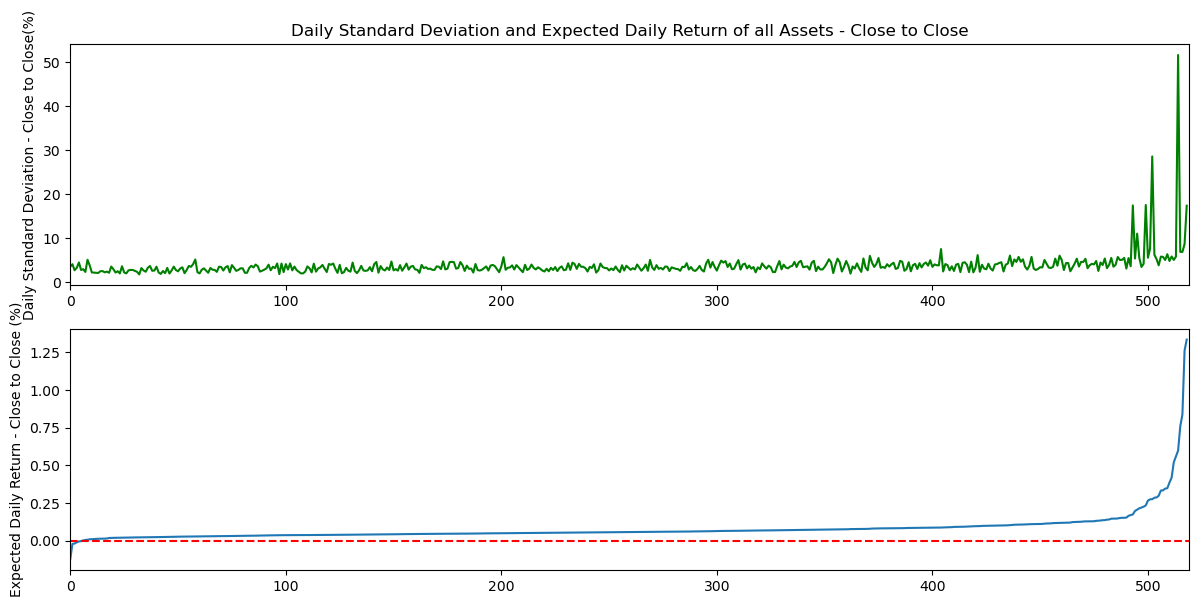

In [20]:
using PyPlot

# Obtain the sorted permutation of each security based on return
sortedSecuritiesCloseToClose = sortperm(CloseToCloseReturnVector)

# Plot the Standard Dev and Return in sorted order for CloseToClose metrics
fig = figure(figsize=(12,6))
subplot(211)
xlim(0, numberCombinedSecurities)
plot(100*sqrt.(CloseToCloseVarianceVector)[sortedSecuritiesCloseToClose], "g")
ylabel("Daily Standard Deviation - Close to Close(%)")
title("Daily Standard Deviation and Expected Daily Return of all Assets - Close to Close")
tight_layout()
#savefig("sortedCloseToCloseStdDev.pdf")

subplot(212)
xlim(0, numberCombinedSecurities)
plot(100*CloseToCloseReturnVector[sortedSecuritiesCloseToClose])
plot([0,numberCombinedSecurities],[0,0],"r--")
ylabel("Expected Daily Return - Close to Close (%)")
tight_layout()
#savefig("sortedCloseToCloseReturn.pdf")
;

#### 4.B.b. Security Correlation Matrix

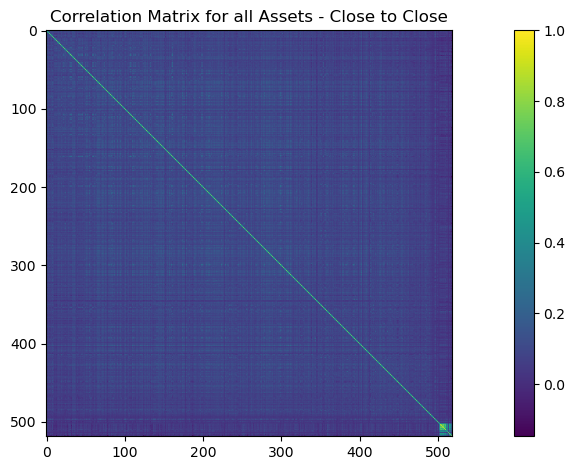

In [21]:
using PyPlot, LinearAlgebra

# Plot the correlation matrix for CloseToClose metrics
corr = diagm(0 => CloseToCloseVarianceVector.^(-1/2))*CloseToCloseCovarianceMatrix*diagm(0 => CloseToCloseVarianceVector.^(-1/2))
imshow(corr[sortedSecuritiesCloseToClose,sortedSecuritiesCloseToClose]);colorbar();axis("image")
title("Correlation Matrix for all Assets - Close to Close")
tight_layout()
#savefig("closeToCloseCorrelationMatrix.pdf")
;

#### 4.B.c. Security Standard Deviation vs Expected Daily Return Scatter Plot

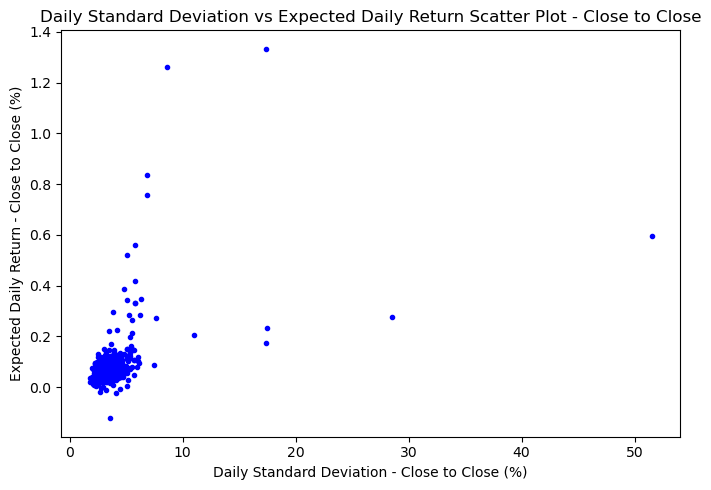

In [22]:
using PyPlot

# Plot the assets for CloseToClose Metrics
figure(figsize=(7,5))
plot(100*sqrt.(CloseToCloseVarianceVector), 100*CloseToCloseReturnVector, "b.")
xlabel("Daily Standard Deviation - Close to Close (%)")
ylabel("Expected Daily Return - Close to Close (%)")
title("Daily Standard Deviation vs Expected Daily Return Scatter Plot - Close to Close")
tight_layout() 
#savefig("closeToCloseReturnVsStdDevScatterPlot.pdf")
;

#### 4.B.d. Optimal Portfolio (λ = 1)

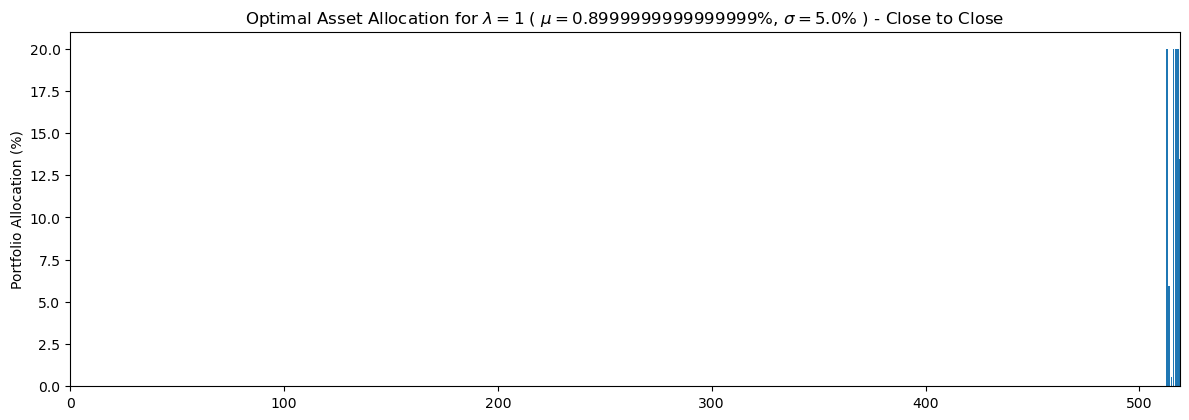

In [23]:
using PyPlot

# CloseToClose - λ = 1
figure(figsize=(12,8))
subplot(211)
xlim(0,numberCombinedSecurities)
bar(1:numberCombinedSecurities,100*xsol_close2close_1[sortedSecuritiesCloseToClose])
title(string("Optimal Asset Allocation for \$\\lambda=1\$"," ( \$\\mu=\$", 100*round(ret_close2close_1,digits=3), "%, \$\\sigma=\$", 100*round(std_close2close_1,digits=2), "% ) - Close to Close"));
ylabel("Portfolio Allocation (%)")
tight_layout()
#savefig("optimalCloseToCloseAssetAllocation_1.pdf")
;

#### 4.B.e. Optimal Portfolio (λ = 3e-2)

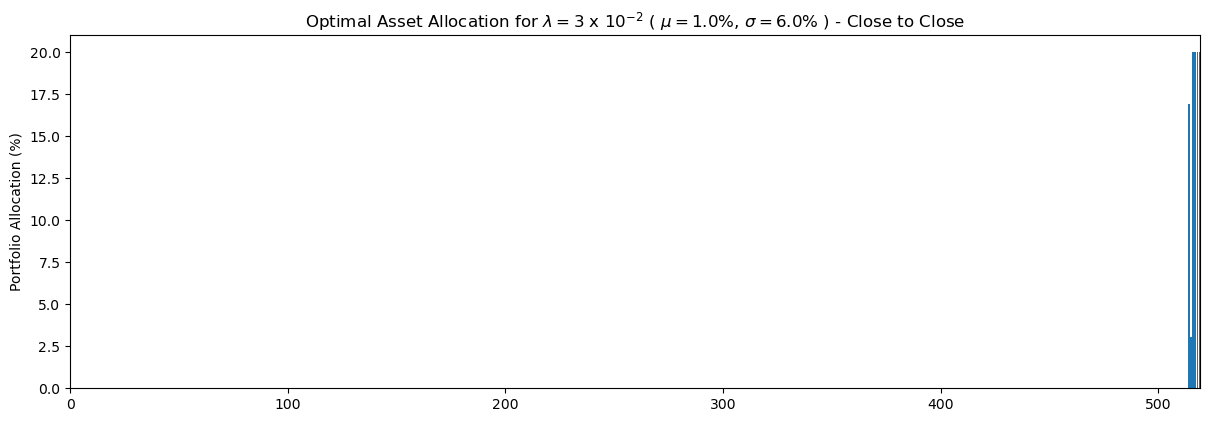

In [24]:
using PyPlot

# CloseToClose - λ = 3e-2
figure(figsize=(12,8))
subplot(211)
xlim(0,numberCombinedSecurities)
bar(1:numberCombinedSecurities,100*xsol_close2close_3e_2[sortedSecuritiesCloseToClose])
title(string("Optimal Asset Allocation for \$\\lambda=3\$ x \$ 10^{-2}\$"," ( \$\\mu=\$", 100*round(ret_intraday_3e_2,digits=3), "%, \$\\sigma=\$", 100*round(std_intraday_3e_2,digits=2), "% ) - Close to Close"));
tight_layout()
ylabel("Portfolio Allocation (%)")
#savefig("optimalCloseToCloseAssetAllocation_3e_2.pdf")
;

#### 4.B.f. Optimal Portfolio Paredo Curve

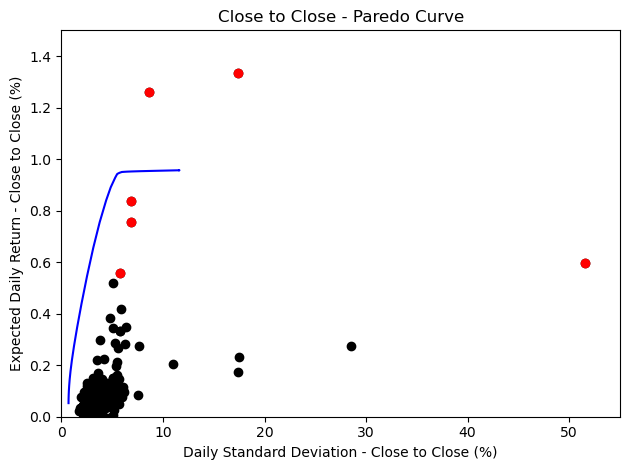

In [48]:
using PyPlot

# Plot the optimal curve - CloseToClose metrics
plot(100*std_close2close,100*ret_close2close,"b-")
plot(100*sqrt.(diag(CloseToCloseCovarianceMatrix)), 100*CloseToCloseReturnVector, "k.", markersize=12)
# plot(sqrt.(diag(CloseToCloseCovarianceMatrix))[interestingX_close2close_1], CloseToCloseReturnVector[interestingX_close2close_1], "r.", markersize=12)  # low-risk portfolio
plot(100*sqrt.(diag(CloseToCloseCovarianceMatrix))[interestingX_close2close_3e_2], 100*CloseToCloseReturnVector[interestingX_close2close_3e_2], "r.", markersize=12)  # at the "elbow" of the curve
xlabel("Daily Standard Deviation - Close to Close (%)")
ylabel("Expected Daily Return - Close to Close (%)")
title("Close to Close - Paredo Curve")
axis([0,55,0,1.5]);
tight_layout()
#savefig("closeToCloseOptimalAllocationParedoCurve.pdf")

### 4.C. Industry Comparison

#### 4.C.a. Sorted Industry Average Daily Return and Standard Deviation

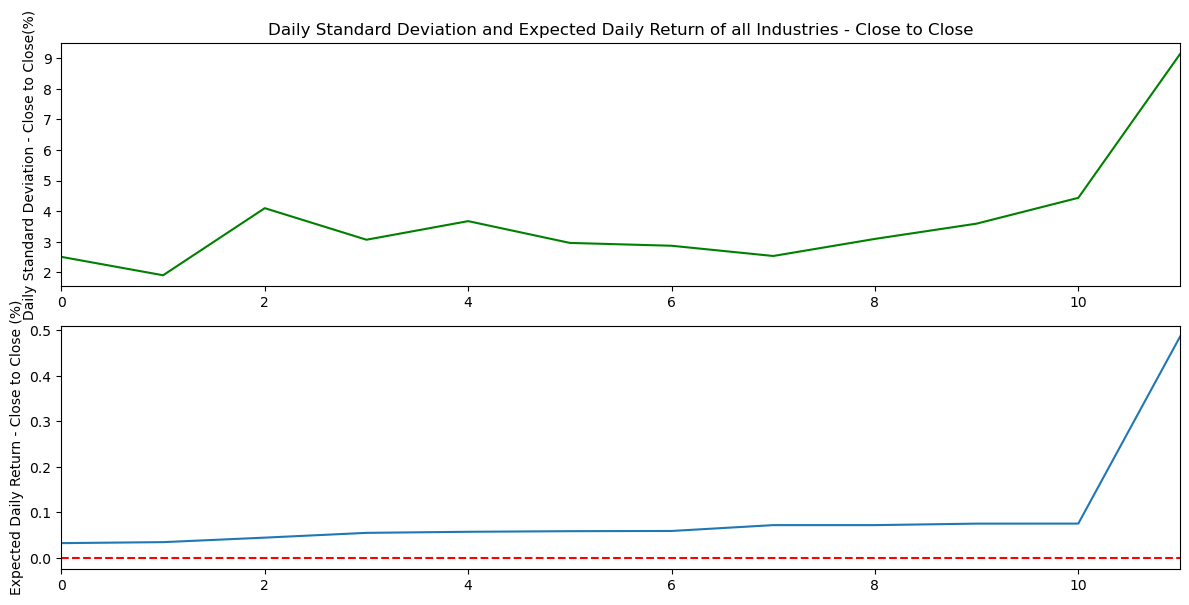

In [25]:
using PyPlot

sortedIndustriesCloseToClose = sortperm(IndustryCloseToCloseReturnVector)

# Plot the Standard Dev and Return in sorted order for CloseToClose metrics
fig = figure(figsize=(12,6))
subplot(211)
xlim(0, numberCombinedIndustries-1)
plot(100*sqrt.(IndustryCloseToCloseVarianceVector)[sortedIndustriesCloseToClose], "g")
ylabel("Daily Standard Deviation - Close to Close(%)")
title("Daily Standard Deviation and Expected Daily Return of all Industries - Close to Close")
tight_layout()
#savefig("sortedCloseToCloseIndustryStdDev.pdf")

subplot(212)
xlim(0, numberCombinedIndustries-1)
plot(100*IndustryCloseToCloseReturnVector[sortedIndustriesCloseToClose])
plot([0,numberCombinedIndustries-1],[0,0],"r--")
ylabel("Expected Daily Return - Close to Close (%)")
tight_layout()
#savefig("sortedCloseToCloseIndustryReturn.pdf")
;

#### 4.C.b. Industry Correlation Matrix

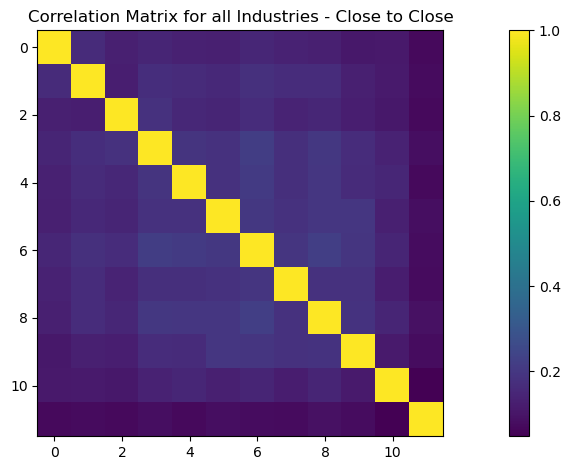

In [26]:
using PyPlot, LinearAlgebra

# Plot the correlation matrix for CloseToClose metrics
corr = diagm(0 => IndustryCloseToCloseVarianceVector.^(-1/2))*IndustryCloseToCloseCovarianceMatrix*diagm(0 => IndustryCloseToCloseVarianceVector.^(-1/2))
imshow(corr[sortedIndustriesCloseToClose,sortedIndustriesCloseToClose]);colorbar();axis("image")
title("Correlation Matrix for all Industries - Close to Close")
tight_layout()
#savefig("closeToCloseIndustryCorrelationMatrix.pdf")

#### 4.C.c. Industry Standard Deviation vs Expected Daily Return Scatter Plot

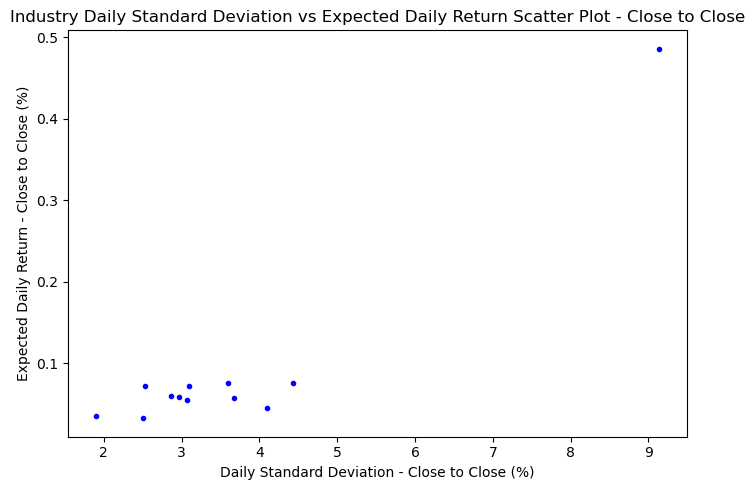

In [27]:
using PyPlot

# Plot the industries for CloseToClose Metrics
figure(figsize=(7,5))
plot(100*sqrt.(IndustryCloseToCloseVarianceVector), 100*IndustryCloseToCloseReturnVector, "b.")
xlabel("Daily Standard Deviation - Close to Close (%)")
ylabel("Expected Daily Return - Close to Close (%)")
title("Industry Daily Standard Deviation vs Expected Daily Return Scatter Plot - Close to Close")
tight_layout() 
#savefig("closeToCloseIndustryReturnVsStdDevScatterPlot.pdf")
;

#### 4.C.d. Optimal Industry Allocation (λ = 1)

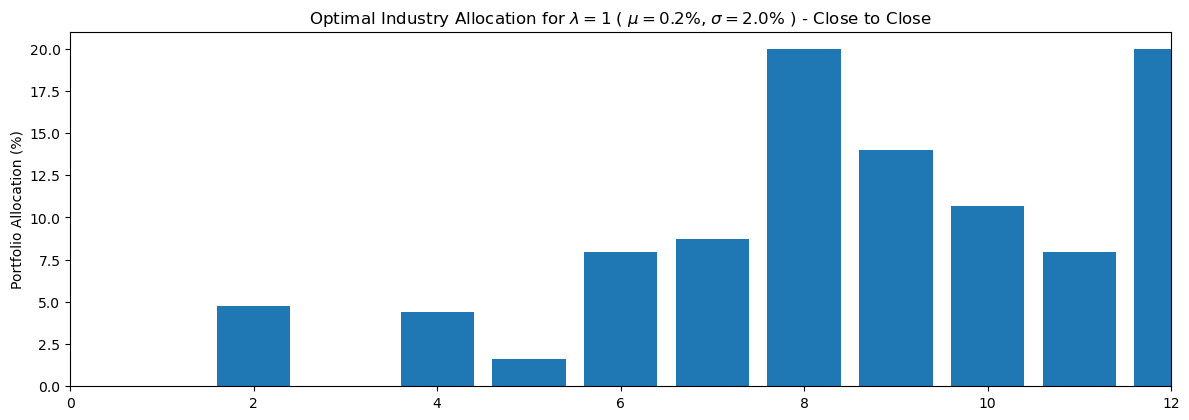

In [28]:
using PyPlot

figure(figsize=(12,8))
subplot(211)
xlim(0,numberCombinedIndustries)
bar(1:numberCombinedIndustries,100*industry_xsol_close2close_1[sortedIndustriesCloseToClose])
title(string("Optimal Industry Allocation for \$\\lambda=1\$"," ( \$\\mu=\$", 100*round(industry_ret_close2close_1,digits=3), "%, \$\\sigma=\$", 100*round(industry_std_close2close_1,digits=2), "% ) - Close to Close"));
ylabel("Portfolio Allocation (%)")
tight_layout()
#savefig("optimalCloseToCloseIndustryAllocation_1.pdf")

#### 4.C.e. Optimal Industry Allocation (λ = 3e-2)

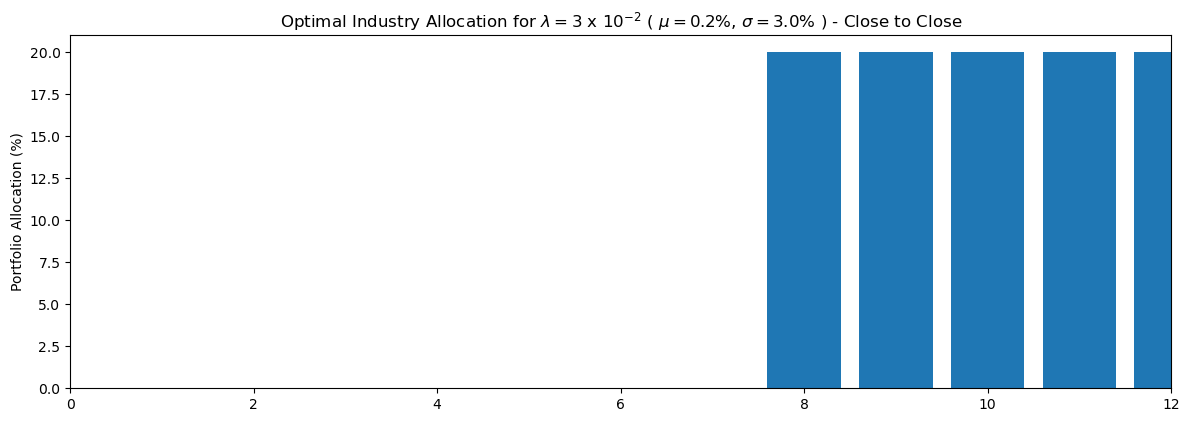

In [29]:
using PyPlot

figure(figsize=(12,8))
subplot(211)
xlim(0,numberCombinedIndustries)
bar(1:numberCombinedIndustries,100*industry_xsol_close2close_3e_2[sortedIndustriesCloseToClose])
title(string("Optimal Industry Allocation for \$\\lambda=3\$ x \$ 10^{-2}\$"," ( \$\\mu=\$", 100*round(industry_ret_intraday_3e_2,digits=3), "%, \$\\sigma=\$", 100*round(industry_std_intraday_3e_2,digits=2), "% ) - Close to Close"));
ylabel("Portfolio Allocation (%)")
tight_layout()
#savefig("optimalCloseToCloseIndustryAllocation_3e_2.pdf")
;

#### 4.C.f. Optimal Industry Allocation Paredo Curve

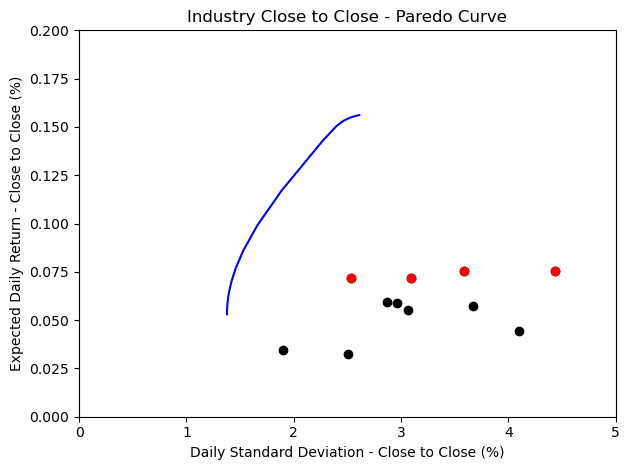

In [46]:
using PyPlot

# Plot the optimal curve - CloseToClose metrics
plot(100*industry_std_close2close,100*industry_ret_close2close,"b-")
plot(100*sqrt.(diag(IndustryCloseToCloseCovarianceMatrix)), 100*IndustryCloseToCloseReturnVector, "k.", markersize=12)
# plot(sqrt.(diag(IndustryCloseToCloseCovarianceMatrix))[industry_interestingX_close2close_1], IndustryCloseToCloseReturnVector[industry_interestingX_close2close_1], "r.", markersize=12)  # low-risk portfolio
plot(100*sqrt.(diag(IndustryCloseToCloseCovarianceMatrix))[industry_interestingX_close2close_3e_2], 100*IndustryCloseToCloseReturnVector[industry_interestingX_close2close_3e_2], "r.", markersize=12)  # at the "elbow" of the curve
xlabel("Daily Standard Deviation - Close to Close (%)")
ylabel("Expected Daily Return - Close to Close (%)")
title("Industry Close to Close - Paredo Curve")
axis([0,5,0,0.2]);
tight_layout()
#savefig("closeToCloseOptimalIndustryAllocationParedoCurve.pdf")

### 4.D. Combined Optimization

#### 4.D.a. Optimal Combined Portfolio

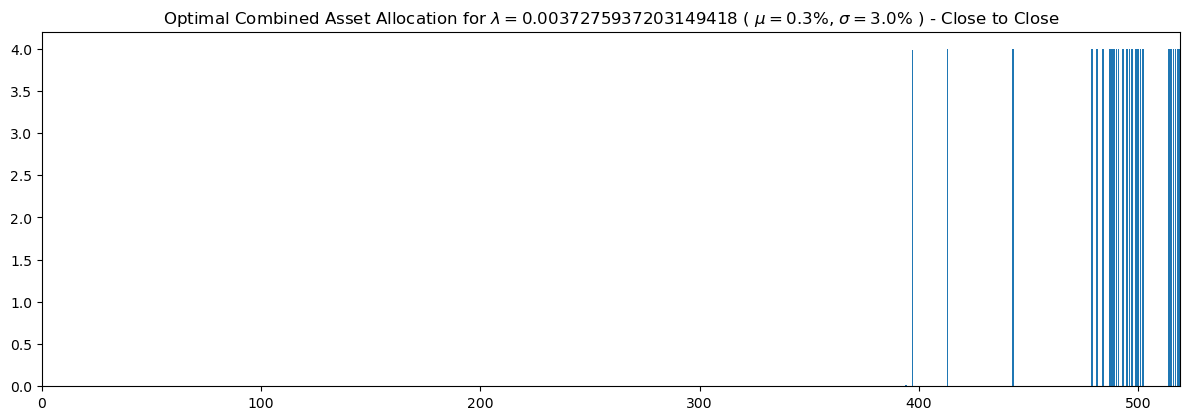

In [47]:
using PyPlot
figure(figsize=(12,8))

# CloseToClose - λ = 1
subplot(211)
xlim(0,numberCombinedSecurities)
bar(1:numberCombinedSecurities,100*optimalCombinedAllocationVector[sortedSecuritiesCloseToClose])
title(string("Optimal Combined Asset Allocation for \$\\lambda=\$", highestReturnLambda, " ( \$\\mu=\$", 100*round(CombinedOptimizationReturnCloseToClose[highestReturnIndex],digits=3), "%, \$\\sigma=\$", 100*round(CombinedOptimizationStdCloseToClose[highestReturnIndex],digits=2), "% ) - Close to Close"));
tight_layout()
#savefig("optimalCombinedAssetAllocation.pdf")

#### 4.D.b. Optimal Combined Portfolio Paredo Curve

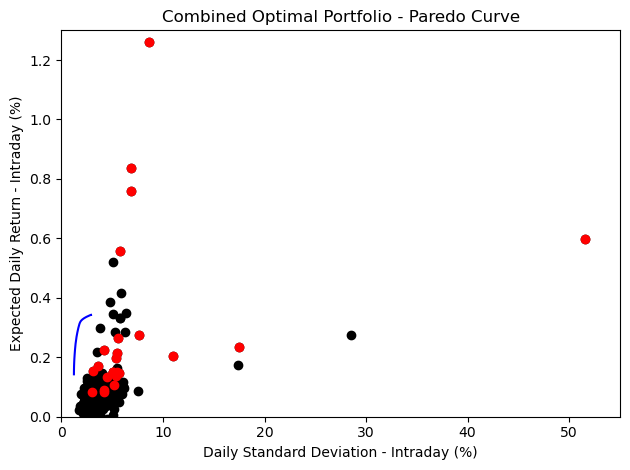

In [49]:
using PyPlot

# Plot the optimal curve 
plot(100*CombinedOptimizationStdCloseToClose,100*CombinedOptimizationReturnCloseToClose,"b-")
plot(100*sqrt.(diag(CloseToCloseCovarianceMatrix)), 100*CloseToCloseReturnVector, "k.", markersize=12)
# plot(sqrt.(diag(IndustryIntradayCovarianceMatrix))[industry_interestingX_intraday_1], IndustryIntradayReturnVector[industry_interestingX_intraday_1], "r.", markersize=12)  # low-risk portfolio
plot(100*sqrt.(diag(CloseToCloseCovarianceMatrix))[interestingCombinedSecurities], 100*CloseToCloseReturnVector[interestingCombinedSecurities], "r.", markersize=12)  # at the "elbow" of the curve
xlabel("Daily Standard Deviation - Intraday (%)")
ylabel("Expected Daily Return - Intraday (%)")
title("Combined Optimal Portfolio - Paredo Curve")
axis([0,55,0,1.3]);
tight_layout()
#savefig("intradayOptimalIndustryAllocationParedoCurve.pdf")

### 4.E. Discussion

#### 4.E.a. General Results Discussion

After running all blocks of code in sequential order, the investor is presented with a breakdown of the security allocation distribution of the optimal portfolio and a number of figures describing various metrics gleaned from the data. It is important to keep in mind that the figures are shown on a expected daily return basis, and that if you want to approximate the annual return given an expected daily return, you may use

$$
    A = ((1 + D)^{365} - 1) * 100
$$

where A represents the expected annual % return, and D represents the expected daily return.

From the end of section 3, we see that the optimal portfolio over all stocks and cryptocurrencies, analyzed over the past 20 years or entire ticker history worth of daily time series data, could result in an expected annual return of 248.81%. Furthermore, from comparing the optimal allocation distributions with and without industry allocation optimization first resulted in portfolios of different degrees of diversification, which is exactly what we wanted to produce. Cryptocurrencies have had impressive returns throughout their history, and it makes sense that many of them are chosen to be a part of the optimal portfolios. Cryptocurrencies are the reason that the optimal return is almost clearing a mind-boggling 250% annually; however, as the figures show, they come with some serious risk and variance. Some of the cryptocurrencies included are also rather young, and hence, come with high uncertainty. One potential fix for this in the future is to only consider securities with a certain length track record or longer so as to remove some of the uncertainty noise.

Another important thing to keep in mind with the final results used in this project is the parameters used to get them. I began by optimizing over all industries with a range of lambda values. After using all lambda values to calculate a portfolio at that risk-tolerance level, I found the value of lambda which resulted in the highest expected return. I used the results from this industry allocation breakdown for the next part with security selection. After obtaining the optimal industry allocation, I optimized over all securities in the chosen industries again using a range of values for lambda. The final results shown are those of the highest expected return of individual security allocation over the industries from the highest expected return industry allocation. Different portfolios of varying degrees of risk can be determined by adjusting the way we pass on values of lambda. For example, if you were interested in the most stable allocation of industries, you might use that value of lambda which results in the lowest portfolio standard deviation, rather than the highest return. This can give a way to provide more options for the investor to tailor their portfolio.

Overall, the results do give me confidence when I see names such as Tesla and PayPal, both of which I know to be phenomenal companies, for example.

#### 4.E.b. Model Limitations

In terms of its potential to perform the task it is intend to perform: determine an optimal portfolio allocation given a subset of stock and cryptocurrency tickers, I think this model and tool as a whole is sufficiently capable. The model's premise is the tradeoff between expected return and the portfolio's variability, or risk. This tradeoff is regulated by a function parameter, lambda, which does have an impact on the results, but is more of an assumption than model limitation.

Perhaps one limitation of this program is in the data. Not all stocks and cryptocurrencies have the same duration of time spent in the markets, and so sometimes we are comparing very small subsets of a stock's history with a different stock's entire history for the sake of calculating covariance. This surely gives varying degrees of uncertainty in the covariance matrices and different levels of uncertainty in expected daily returns. Finding a way to account for uncertainty in a data set might be a good way to acknowledge the differences in track record duration, and could potentially be factored into the decision making process.

As it stands, the tool has the direct limitation of only considering the securities specified in the ticker seed files; however, It should not be too burdensome to expand the selection of securities.

Perhaps one of the most obvious limitations is that the model is forced to adhere to the constraints set and tradeoff functions used. It would not be too difficult to use different risk models if they are recognized as acceptable substitutes, and the potential exists to even use multiple different measures of risk and determine an optimal portfolio somewhere in between the edges.

#### 4.E.c. Assumption Sensitivity

One major assumption made in this project was the maximum investment of 20% of an industry's allocated budget. Without this cap, the entire investment portfolio would have been comprised of cryptocurrencies, because comparatively they have blown everything else away during their time in the markets. I wanted to create a more diversified portfolio; however, and really get a sense of the mixture between cryptocurrency inclusion and traditional asset foundation. So with that being said, the assumption of a 20% security maximum is applied to the industry distribution, then applied once more to the security distribution, effectively resulting in a 4% total portfolio maximum investment in any one individual security. I would say the model has rather high sensitivity to this assumption because the results change dramatically when it is adjusted. This is another parameter that the tool will allow the investor to set for themself when it is in its final form.

Another assumption made is that all cryptocurrencies should be treated equally. In my biased opinion, this should not be the case. They have different use cases, track record durations, maturity levels, and other qualities that may be more applicable to creating another separate industry vs. lumping them all in the 'Cryptocurrency' basket. I did not get a chance to investigate this, so I do not know how sensitive the model would be to it; however, given that cryptocurrencies have many of the best performances in their history, splitting them into different industries would surely have an impact given industry and security maximums.

Other than that, there is not much left to assumption. The lambda values are determined such that we get the portfolio with highest expected return, and this is certainly an assumption; however, the final form of the tool will have qualitative options available to the investor to guide the value of lambda used in their portfolio. The rest is all based on statistics and calculation.

## 5. Conclusion ##

### 5.A. Summary

In summary, I have built a tool that currently works on the securities in the S&P500 and top 14 cryptocurrencies by market cap; however, it is capable of obtaining live daily time series data for any stock or cryptocurrency ticker one wishes to add to the list. The tool works by obtaining and organizing data, computing statstical metrics such as average daily return and the security covariance matrix, then optimizes an investment portfolio using straightforward quadratic programming by first selecting an optimal industry allocation distribution, then optimizing over all securities in each chosen industry to determine the optimal security allocation distribution.

With the current selection of tickers being used, I found the optimal portfolio adhering to the diversification constraints would have, in hindsight, resulted in an expected annual return of 248%. While these results certainly need to be taken with a grain of salt and seen with an aura of uncertainty, they are interesting nonetheless. When I look through some of the companies suggested: Tesla, ServiceNow, Regeneron Pharmaceuticals, PayPal, Nvidia, Hilton, Equinix, there is no denying that these are some heavy-hitting companies that have had tremendous performance over the past decades, and continue to be some of the hottest companies in the markets today. This does give me some confidence in the results that they are indeed sound, and furthermore, make me confident that the suggestion of holding cryptocurrencies in a responsible investment portfolio is not ludicrous. Sometimes it can be difficult for retail investors to find stocks that have performed well, there are thousands of companis after all, way too many to keep track of. I think one very good use case for this tool is to do that initial work for you. The tool can take in thousands of tickers and tell you which have consistently performed the best over the last 20 years. Although that should not be a trigger to automatically invest blindly in the results, you can use the results to get a finite list of some of the top performers to then go do final due dilligence on before making the decision to invest.

In attempting to answer our high level question of: Do cryptocurrencies belong in a responsible retail investment portfolio? I would conclude that the answer to that is yes, they most certainly have a place. The young, addrenaline seeking, tech enthusiast might decide they want to go all in on 3 or 4 volatile stocks / cryptocurrencies, making or breaking their bank in the process. There is nothing to say this is not an acceptable investment strategy when time is on your side. For that, this tool can be used to find the overall best performing assest in the last 2 decades from thousands of options, and give some ideas for what to go all in on. Additionally, the future final form of the tool will have options to remove securities with too short of a history or remove them if the investor is just generally uninterested in even comparing. For the investor who would like to focus on managing risk and building a steady portfolio over time to carry into retirement, the future final form of this tool will be incredibly useful to include / exclude particular industries from consideration, set risk tolerance levels and bound the worst case scenarios, all while still determining the optimal portfolio from the options left. Investment strategy takes on many different forms; however, I believe this tool has a place in each. If for no other reason than to provide a list of the stocks an investor might be considering to get a sense of the history and performance comparatively over decades' worth of data.

### 5.B. Future Work
I have an incredibly strong interest in investment theory, practice, ideas, and the entire stock market as a whole. Ever since I began taking advanced math classes dealing in randomness and probability, I've been working to understand ways to model the stock market mathematically and try to make sense out of all the data in an attempt to guide decision making. The ideas and implementations presented in this project do indeed make progress towards obtaining key insights that can be gleaned from large-scale data analysis; however, there is much more content and ideas left to explore to make this tool thorough and robust. I intend to carry on this research / project development into the summer and beyond, and a few of the immediate concepts I intend to look into are:

- More Industries / Markets - At the moment there are 11 stock industries, and 1 general cryptocurrency industry that all cryptocurrencies are basketed into. This provides analysis on approximately 519 total securities; however, there are obviously thousands more that could be made a part of this analysis. Markets such as FOREX, Commodities, and stocks in the DOW and NASDAQ indices could all be great places to start with more data acquisition in order to give analysis on a more robust subset of market options. Similarly, right now all cryptocurrencies are bundled into the 'Cryptocurrency' industry; however, each cryptocurrencies has nuances in the way it is categorized and used, so another future direction could be to be more specific in cryptocurrency industry assignment so as to get a more diverse sampling across industries.

- Flexibility / Choice / Interactivity - With more data acquisition / analysis comes more flexibility and choice, so when I do bring in data from other markets, I also intend to offer interactive choices throughout the flow of the optimization tool so the investor can customize the set of securities their portfolio is being optimized over.

- Performance Feedback Mechanism - The data I have available for consumption includes daily time series data of a security's entire history or past 20 years worth of market performance, whichever is shorter. Right now I use the entire history towards the optimization calculations; however, I am quite interested in cutting out the most recent X days' worth of performance, optimizing over the remaining data, and using the most recent X days of performance of the optimized portfolio's choices to test the ongoing performance of the portfolio. At the surface this is just a way to essentially give test samples to a trained model and get performance results; however, there could be some room to implement a feedback mechanism based on the future performance of a chosen portfolio so that multiple iterations can be run and the model fine tunes itself over the iterations.

- Bounding Boxes - An interesting concept that we looked at in class was the idea of a Norm Ball that could potentially be used to bound the uncertainty of the model's optimized portfolios. This could be a way to implement a safety mechanism to bound the uncertainty of the portfolios chosen by the model. This could, for example, ensure that the maximum of the worst possible portfolio's return is contained within a bounding norm ball.

- Refine Model Parameters - Right now I have it set such that the maximum investment in any one industry or asset is 20\% of the allocated amount. For example, if industry 1 was allocated 15\% of a total investment portfolio, then the model will optimize over all stocks contained in industry 1 with the same 20\% limit on individual securities; however, it is taken with respect to the allocated amount, so in this case, the maximum investment that the model would choose for any 1 stock in industry 1 would be .15 * .20 = .03\% of the investor's total portfolio. I currently do not have a minimum investment amount set because there are a certain subset of tickers that always get selected if available given the current maximum investment level. Minimum investments are currently not an issue. In future work, it will be worthwhile to look at these values and tweak them per results feedback to try finding the right balance between performance and diversification. Instead of a static limit, perhaps there is a way to explore dynamic limits based on the \$ investment amount the model is considering.

- Conditional Value at Risk - Risk management is obviously paramount towards responsible portfolio selection, and the financial world has various models of risk. In this tool, I use the covariance between industries and securities as a risk measure; however, another popular choice is CVaR, or, Conditional Value at Risk. CVAR is defined with respect to the VaR such that:

$$
    CVaR = \frac{1}{1 - c} \int_{-1}^{VaR} x*p(x)dx \\
    \text{where} \\
    p(x)dx: \text{probability density of getting a return with value 'x'} \\
    c: \text{cut-off point on the distribution of the VaR breakpoint} \\
    VaR: \text{agreed-upon VaR level}
$$

In conclusion, I had a lot of fun working on building this tool and looking into financial optimization. The results obtained and discussed in this report are sufficient for the time being, and provide good baseline results; however, there is much room for expansion and I look forward to continuing this project into the summer. My ultimate goal is a thorough tool that works on sound statistical and investment theory principles, and harnesses data from thousands of securities across any and all major financial markets to make decisions on individual security selection. Right now I think the tool is in a good introductory place; it's functional, has tweakable parameters, gives interesting results, and displays useful information and analysis; however, I think the tool is rather naive at this point. There are dozens of ideas and concepts I intend on looking into to build the tool out to be as robust as possible. Considering alternative approaches to risk, alternative markets, optimizing performance, adding feedback mechanisms, adding interactive customization, and more; all of these are improvements on my immediate radar to work on integrating with the tool to make it more advanced and reliable. At the end of the day, 248\% isn't half bad for an annual rate of return. It would be hard to expect a repeat of that performance; however, if you could get even half of that return and let your money sit for a few decades, you won't have to think about money for another day in your life. Using this tool intelligently and applying your insights to the real world markets has the potential to seriously change your life, and cryptocurrencies are most certainly becoming an increasingly large part of that.

*I am not a financial advisor, nor is this tool meant to provide direct financial advice. Past performance can give good insights and baseline direction; however, it is not a guarentee of future results. Use the suggestions from this tool at your own risk.*